In [2]:
! pip install selenium

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import time

In [4]:
URL = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.price_range.from%3D20000&p%5B%5D=facets.price_range.to%3DMax&page=1'
page = requests.get(URL)
page.status_code

200

In [5]:
page.content

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.914d0a.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

In [6]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.914d0a.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x

In [7]:
name = soup.find('div', class_ = '_4rR01T')
name.text

'APPLE iPhone 13 (Green, 128 GB)'

In [8]:
price = soup.find('div', class_ = '_30jeq3 _1_WHN1')
price.text

'₹61,999'

In [9]:
rating = soup.find('div', class_ = '_3LWZlK')
rating.text

'4.7'

In [10]:
ratings_reviews = soup.find('span', class_ = '_2_R_DZ')
ratings_reviews.text

'2,24,052 Ratings\xa0&\xa011,601 Reviews'

In [11]:
specifications = soup.find('div', class_ = 'fMghEO')
specifications

<div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">128 GB ROM</li><li class="rgWa7D">15.49 cm (6.1 inch) Super Retina XDR Display</li><li class="rgWa7D">12MP + 12MP | 12MP Front Camera</li><li class="rgWa7D">A15 Bionic Chip Processor</li><li class="rgWa7D">Brand Warranty for 1 Year</li></ul></div>

In [12]:
specs = specifications.find_all('li', class_ = 'rgWa7D')
specs

[<li class="rgWa7D">128 GB ROM</li>,
 <li class="rgWa7D">15.49 cm (6.1 inch) Super Retina XDR Display</li>,
 <li class="rgWa7D">12MP + 12MP | 12MP Front Camera</li>,
 <li class="rgWa7D">A15 Bionic Chip Processor</li>,
 <li class="rgWa7D">Brand Warranty for 1 Year</li>]

In [13]:
# Extracting product details of all the products on the webpage
product_details = soup.find_all('div', class_ = '_3pLy-c row')
print(len(product_details))
product_details

24


[<div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">APPLE iPhone 13 (Green, 128 GB)</div><div class="gUuXy-"><span class="_1lRcqv" id="productRating_LSTMOBGC9VGSU9DWGJZ0Q1T8E_MOBGC9VGSU9DWGJZ_"><div class="_3LWZlK">4.7</div></span><span class="_2_R_DZ"><span><span>2,24,052 Ratings </span><span class="_13vcmD">&amp;</span><span> 11,601 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">128 GB ROM</li><li class="rgWa7D">15.49 cm (6.1 inch) Super Retina XDR Display</li><li class="rgWa7D">12MP + 12MP | 12MP Front Camera</li><li class="rgWa7D">A15 Bionic Chip Processor</li><li class="rgWa7D">Brand Warranty for 1 Year</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹61,999</div><div class="_3I9_wc _27UcVY">₹<!-- -->69,900</div><div class="_3Ay6Sb"><span>11% off</span></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcar

In [14]:
# Showing product details one by one
for product in product_details:
    # name
    name = product.find('div', class_ = '_4rR01T')
    if name is None:
        print('Name not available')
    else:
        print(name.text)
        
    # price
    price = product.find('div', class_ = '_30jeq3 _1_WHN1')
    if price is None:
        print('Price not available')
    else:
        print(price.text)
        
    # rating
    rating = product.find('div', class_ = '_3LWZlK')
    if rating is None:
        print('Rating not available')
    else:
        print(rating.text)
        
    # ratings and reviews
    ratings_reviews = product.find('span', class_ = '_2_R_DZ')
    if ratings_reviews is None:
        print('Number of Ratings and reviews not available')
    else:
        print(ratings_reviews.text)
        
    # specifications
    features = []
    specifications = product.find('div', class_ = 'fMghEO')
    specs = specifications.find_all('li', class_ = 'rgWa7D')
    for feature in specs:
        features.append(feature.text)
    print(features)
    
    print('=' * 100)
    print()

APPLE iPhone 13 (Green, 128 GB)
₹61,999
4.7
2,24,052 Ratings & 11,601 Reviews
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '12MP + 12MP | 12MP Front Camera', 'A15 Bionic Chip Processor', 'Brand Warranty for 1 Year']

vivo T2 5G (Velocity Wave, 128 GB)
₹20,999
4.4
4,204 Ratings & 283 Reviews
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']

vivo T2 5G (Nitro Blaze, 128 GB)
₹20,999
4.4
4,204 Ratings & 283 Reviews
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']

MOTOROLA Edge 40 (Eclipse Black, 256 GB)
₹29,999
4.3
1,277 Ratings & 294 Reviews
['8 GB RAM | 256 GB ROM', '16.64 cm (6.55 inch) Full HD+ Display', '50MP + 13MP | 32MP Front Camera', '4400 mAh Batt

In [15]:
# Storing information in lists
titles = []
prices = []
ratings = []
RnR = []
features = []

# Extracting product details of all products on the webpage
product_details = soup.find_all('div', class_ = '_3pLy-c row')

for product in product_details:
    # name
    name = product.find('div', class_ = '_4rR01T')
    if name is None:
        titles.append(np.nan)
    else:
        titles.append(name.text)
        
    # price
    price = product.find('div', class_ = '_30jeq3 _1_WHN1')
    if price is None:
        prices.append(np.nan)
    else:
        prices.append(price.text)
        
    # rating
    rating = product.find('div', class_ = '_3LWZlK')
    if rating is None:
        ratings.append(np.nan)
    else:
        ratings.append(rating.text)
        
    # ratings and reviews
    ratings_reviews = product.find('span', class_ = '_2_R_DZ')
    if ratings_reviews is None:
        RnR.append(np.nan)
    else:
        RnR.append(ratings_reviews.text)
        
    # specifications
    f = []
    specifications = product.find('div', class_ = 'fMghEO')
    specs = specifications.find_all('li', class_ = 'rgWa7D')
    for feature in specs:
        f.append(feature.text)
    features.append(f)

In [16]:
print(len(titles))
print(len(prices))
print(len(ratings))
print(len(RnR))
print(len(features))

24
24
24
24
24


In [17]:
print(titles)
print()
print(prices)
print()
print(ratings)
print()
print(RnR)

['APPLE iPhone 13 (Green, 128 GB)', 'vivo T2 5G (Velocity Wave, 128 GB)', 'vivo T2 5G (Nitro Blaze, 128 GB)', 'MOTOROLA Edge 40 (Eclipse Black, 256 GB)', 'Google Pixel 6a (Charcoal, 128 GB)', 'APPLE iPhone 11 (White, 128 GB)', 'Google Pixel 6a (Chalk, 128 GB)', 'APPLE iPhone 11 (Black, 128 GB)', 'APPLE iPhone 13 (Pink, 128 GB)', 'SAMSUNG Galaxy M33 5G (Deep Ocean Blue, 128 GB)', 'POCO X5 Pro 5G (Horizon Blue, 256 GB)', 'POCO X5 Pro 5G (Astral Black, 256 GB)', 'REDMI Note 12 Pro 5G (Stardust Purple, 128 GB)', 'SAMSUNG Galaxy M33 5G (Mystique Green, 128 GB)', 'APPLE iPhone 13 (Midnight, 128 GB)', 'APPLE iPhone 11 (White, 64 GB)', 'APPLE iPhone 13 (Starlight, 128 GB)', 'REDMI Note 12 Pro 5G (Glacier Blue, 128 GB)', 'REDMI Note 12 Pro+ 5G (Obsidian Black, 256 GB)', 'APPLE iPhone 13 (Blue, 128 GB)', 'OnePlus 11R 5G (Galactic Silver, 256 GB)', 'POCO X5 Pro 5G (Horizon Blue, 128 GB)', 'OnePlus 11R 5G (Sonic Black, 256 GB)', 'POCO X5 Pro 5G (Yellow, 256 GB)']

['₹61,999', '₹20,999', '₹20,999',

In [18]:
features

[['128 GB ROM',
  '15.49 cm (6.1 inch) Super Retina XDR Display',
  '12MP + 12MP | 12MP Front Camera',
  'A15 Bionic Chip Processor',
  'Brand Warranty for 1 Year'],
 ['8 GB RAM | 128 GB ROM',
  '16.21 cm (6.38 inch) Full HD+ Display',
  '64 MP (OIS) + 2MP | 16MP Front Camera',
  '4500 mAh Battery',
  'Snapdragon 695 Processor',
  '1 Year of Device & 6 Months for Inbox Accessories'],
 ['8 GB RAM | 128 GB ROM',
  '16.21 cm (6.38 inch) Full HD+ Display',
  '64 MP (OIS) + 2MP | 16MP Front Camera',
  '4500 mAh Battery',
  'Snapdragon 695 Processor',
  '1 Year of Device & 6 Months for Inbox Accessories'],
 ['8 GB RAM | 256 GB ROM',
  '16.64 cm (6.55 inch) Full HD+ Display',
  '50MP + 13MP | 32MP Front Camera',
  '4400 mAh Battery',
  'Dimensity 8020 Processor',
  'Vegan Leather',
  '1 Year Handset and 6 Months Accessories'],
 ['6 GB RAM | 128 GB ROM',
  '15.6 cm (6.14 inch) Full HD+ Display',
  '12.2MP + 12MP | 8MP Front Camera',
  '4410 mAh Battery',
  'Google Tensor Processor',
  '1 Year 

In [19]:
# Storing information in lists
titles = []
prices = []
ratings = []
RnR = []
features = []
pgno = []

# loop to go through webpages
for x in range(1,11):
    start_time = time.time()
    
    URL = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.price_range.from%3D20000&p%5B%5D=facets.price_range.to%3DMax&page={}'.format(x)
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    # Extracting product details of all products on the webpage
    product_details = soup.find_all('div', class_ = '_3pLy-c row')

    for product in product_details:
        # name
        name = product.find('div', class_ = '_4rR01T')
        if name is None:
            titles.append(np.nan)
        else:
            titles.append(name.text)

        # price
        price = product.find('div', class_ = '_30jeq3 _1_WHN1')
        if price is None:
            prices.append(np.nan)
        else:
            prices.append(price.text)

        # rating
        rating = product.find('div', class_ = '_3LWZlK')
        if rating is None:
            ratings.append(np.nan)
        else:
            ratings.append(rating.text)

        # ratings and reviews
        ratings_reviews = product.find('span', class_ = '_2_R_DZ')
        if ratings_reviews is None:
            RnR.append(np.nan)
        else:
            RnR.append(ratings_reviews.text)

        # specifications
        f = []
        specifications = product.find('div', class_ = 'fMghEO')
        specs = specifications.find_all('li', class_ = 'rgWa7D')
        for feature in specs:
            f.append(feature.text)
        features.append(f)
        
        # page number
        pgno.append(x)
        
    end_time = time.time()
    print('Page {} completed in {} seconds'.format(x, end_time - start_time))

Page 1 completed in 1.010118007659912 seconds
Page 2 completed in 0.8084321022033691 seconds
Page 3 completed in 0.7818794250488281 seconds
Page 4 completed in 0.8422329425811768 seconds
Page 5 completed in 0.9347083568572998 seconds
Page 6 completed in 0.7612895965576172 seconds
Page 7 completed in 0.8391571044921875 seconds
Page 8 completed in 0.8256101608276367 seconds
Page 9 completed in 0.7106952667236328 seconds
Page 10 completed in 0.6774892807006836 seconds


In [20]:
print(len(titles))
print(len(prices))
print(len(ratings))
print(len(RnR))
print(len(features))

240
240
240
240
240


In [21]:
data = {'Product_name' : titles,
        'Price'        : prices,
        'Rating'       : ratings,
        'No_of_RnR'    : RnR,
        'Features'     : features,
        'PageNo'       : pgno}

df = pd.DataFrame(data)
df.head(10)

,Product_name,Price,Rating,No_of_RnR,Features,PageNo
0,"APPLE iPhone 13 (Green, 128 GB)","₹61,999",4.7,"2,24,052 Ratings & 11,601 Reviews","[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ...",1
1,"vivo T2 5G (Nitro Blaze, 128 GB)","₹20,999",4.4,"4,204 Ratings & 283 Reviews","[8 GB RAM | 128 GB ROM, 16.21 cm (6.38 inch) F...",1
2,"vivo T2 5G (Velocity Wave, 128 GB)","₹20,999",4.4,"4,204 Ratings & 283 Reviews","[8 GB RAM | 128 GB ROM, 16.21 cm (6.38 inch) F...",1
3,"Google Pixel 6a (Chalk, 128 GB)","₹31,999",4.3,"45,924 Ratings & 5,525 Reviews","[6 GB RAM | 128 GB ROM, 15.6 cm (6.14 inch) Fu...",1
4,"Google Pixel 6a (Charcoal, 128 GB)","₹31,999",4.3,"45,924 Ratings & 5,525 Reviews","[6 GB RAM | 128 GB ROM, 15.6 cm (6.14 inch) Fu...",1
5,"APPLE iPhone 11 (White, 128 GB)","₹44,999",4.6,"1,95,585 Ratings & 11,229 Reviews","[128 GB ROM, 15.49 cm (6.1 inch) Liquid Retina...",1
6,"APPLE iPhone 11 (Black, 128 GB)","₹44,999",4.6,"1,95,585 Ratings & 11,229 Reviews","[128 GB ROM, 15.49 cm (6.1 inch) Liquid Retina...",1
7,"MOTOROLA Edge 40 (Eclipse Black, 256 GB)","₹29,999",4.3,"1,277 Ratings & 294 Reviews","[8 GB RAM | 256 GB ROM, 16.64 cm (6.55 inch) F...",1
8,"APPLE iPhone 11 (White, 64 GB)","₹40,999",4.6,"1,95,585 Ratings & 11,229 Reviews","[64 GB ROM, 15.49 cm (6.1 inch) Liquid Retina ...",1
9,"APPLE iPhone 13 (Pink, 128 GB)","₹61,999",4.7,"2,24,052 Ratings & 11,601 Reviews","[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ...",1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  240 non-null    object
 1   Price         240 non-null    object
 2   Rating        236 non-null    object
 3   No_of_RnR     236 non-null    object
 4   Features      240 non-null    object
 5   PageNo        240 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 11.4+ KB


In [23]:
# Converting price and rating to float
df.Rating = df.Rating.astype(float)
# df.Price = df.Price.apply(lambda s : float(s.replace('₹','').replace(',',''))
df.Price = df.Price.str.replace('₹','').str.replace(',','').astype(float)

print(df.Rating.dtype)
print(df.Price.dtype)
df.head()

float64
float64


,Product_name,Price,Rating,No_of_RnR,Features,PageNo
0,"APPLE iPhone 13 (Green, 128 GB)",61999.0,4.7,"2,24,052 Ratings & 11,601 Reviews","[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ...",1
1,"vivo T2 5G (Nitro Blaze, 128 GB)",20999.0,4.4,"4,204 Ratings & 283 Reviews","[8 GB RAM | 128 GB ROM, 16.21 cm (6.38 inch) F...",1
2,"vivo T2 5G (Velocity Wave, 128 GB)",20999.0,4.4,"4,204 Ratings & 283 Reviews","[8 GB RAM | 128 GB ROM, 16.21 cm (6.38 inch) F...",1
3,"Google Pixel 6a (Chalk, 128 GB)",31999.0,4.3,"45,924 Ratings & 5,525 Reviews","[6 GB RAM | 128 GB ROM, 15.6 cm (6.14 inch) Fu...",1
4,"Google Pixel 6a (Charcoal, 128 GB)",31999.0,4.3,"45,924 Ratings & 5,525 Reviews","[6 GB RAM | 128 GB ROM, 15.6 cm (6.14 inch) Fu...",1


In [24]:
text = '3,346 Ratings & 223 Reviews'
rating_regex = re.compile(r'([\d,\s]+)Ratings')
ratings = rating_regex.findall(text)
int(ratings[0].strip().replace(',',''))

3346

In [25]:
# creating functions to get number of ratings and number of reviews
def get_ratings(text):
    if text is np.nan:
        return 0
    else:
        rating_regex = re.compile(r'([\d,\s]+)Ratings')
        ratings = rating_regex.findall(text)
        ratings = int(ratings[0].strip().replace(',',''))
        return ratings
    
def get_reviews(text):
    if text is np.nan:
        return 0
    else:
        review_regex = re.compile(r'([\d,\s]+)Reviews')
        reviews = review_regex.findall(text)
        reviews = int(reviews[0].strip().replace(',',''))
        return reviews
    
print(get_ratings('3,346 Ratings & 223 Reviews'))
print(get_reviews('3,346 Ratings & 223 Reviews'))

3346
223


In [26]:
# Creating columns No_of_ratings and No_of_reviews
df['No_of_ratings'] = df.No_of_RnR.apply(get_ratings)
df['No_of_reviews'] = df.No_of_RnR.apply(get_reviews)
df.drop('No_of_RnR', axis = 1, inplace = True)

df.head(10)

,Product_name,Price,Rating,Features,PageNo,No_of_ratings,No_of_reviews
0,"APPLE iPhone 13 (Green, 128 GB)",61999.0,4.7,"[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ...",1,224052,11601
1,"vivo T2 5G (Nitro Blaze, 128 GB)",20999.0,4.4,"[8 GB RAM | 128 GB ROM, 16.21 cm (6.38 inch) F...",1,4204,283
2,"vivo T2 5G (Velocity Wave, 128 GB)",20999.0,4.4,"[8 GB RAM | 128 GB ROM, 16.21 cm (6.38 inch) F...",1,4204,283
3,"Google Pixel 6a (Chalk, 128 GB)",31999.0,4.3,"[6 GB RAM | 128 GB ROM, 15.6 cm (6.14 inch) Fu...",1,45924,5525
4,"Google Pixel 6a (Charcoal, 128 GB)",31999.0,4.3,"[6 GB RAM | 128 GB ROM, 15.6 cm (6.14 inch) Fu...",1,45924,5525
5,"APPLE iPhone 11 (White, 128 GB)",44999.0,4.6,"[128 GB ROM, 15.49 cm (6.1 inch) Liquid Retina...",1,195585,11229
6,"APPLE iPhone 11 (Black, 128 GB)",44999.0,4.6,"[128 GB ROM, 15.49 cm (6.1 inch) Liquid Retina...",1,195585,11229
7,"MOTOROLA Edge 40 (Eclipse Black, 256 GB)",29999.0,4.3,"[8 GB RAM | 256 GB ROM, 16.64 cm (6.55 inch) F...",1,1277,294
8,"APPLE iPhone 11 (White, 64 GB)",40999.0,4.6,"[64 GB ROM, 15.49 cm (6.1 inch) Liquid Retina ...",1,195585,11229
9,"APPLE iPhone 13 (Pink, 128 GB)",61999.0,4.7,"[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ...",1,224052,11601


In [27]:
# Creating a regex to extract brand
brand_regex = re.compile(r'^\w+')
brand_regex.findall('Apple iphone 14')[0]

'Apple'

In [28]:
# creating a brand column
df['Brand'] = df.Product_name.apply(lambda s : brand_regex.findall(s)[0])
df.head(10)

,Product_name,Price,Rating,Features,PageNo,No_of_ratings,No_of_reviews,Brand
0,"APPLE iPhone 13 (Green, 128 GB)",61999.0,4.7,"[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ...",1,224052,11601,APPLE
1,"vivo T2 5G (Nitro Blaze, 128 GB)",20999.0,4.4,"[8 GB RAM | 128 GB ROM, 16.21 cm (6.38 inch) F...",1,4204,283,vivo
2,"vivo T2 5G (Velocity Wave, 128 GB)",20999.0,4.4,"[8 GB RAM | 128 GB ROM, 16.21 cm (6.38 inch) F...",1,4204,283,vivo
3,"Google Pixel 6a (Chalk, 128 GB)",31999.0,4.3,"[6 GB RAM | 128 GB ROM, 15.6 cm (6.14 inch) Fu...",1,45924,5525,Google
4,"Google Pixel 6a (Charcoal, 128 GB)",31999.0,4.3,"[6 GB RAM | 128 GB ROM, 15.6 cm (6.14 inch) Fu...",1,45924,5525,Google
5,"APPLE iPhone 11 (White, 128 GB)",44999.0,4.6,"[128 GB ROM, 15.49 cm (6.1 inch) Liquid Retina...",1,195585,11229,APPLE
6,"APPLE iPhone 11 (Black, 128 GB)",44999.0,4.6,"[128 GB ROM, 15.49 cm (6.1 inch) Liquid Retina...",1,195585,11229,APPLE
7,"MOTOROLA Edge 40 (Eclipse Black, 256 GB)",29999.0,4.3,"[8 GB RAM | 256 GB ROM, 16.64 cm (6.55 inch) F...",1,1277,294,MOTOROLA
8,"APPLE iPhone 11 (White, 64 GB)",40999.0,4.6,"[64 GB ROM, 15.49 cm (6.1 inch) Liquid Retina ...",1,195585,11229,APPLE
9,"APPLE iPhone 13 (Pink, 128 GB)",61999.0,4.7,"[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ...",1,224052,11601,APPLE


In [29]:
# Converting features list to string  (to work with regular expressions)
df.Features = df.Features.apply(lambda x : ','.join(x))
df.head(10)

,Product_name,Price,Rating,Features,PageNo,No_of_ratings,No_of_reviews,Brand
0,"APPLE iPhone 13 (Green, 128 GB)",61999.0,4.7,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",1,224052,11601,APPLE
1,"vivo T2 5G (Nitro Blaze, 128 GB)",20999.0,4.4,"8 GB RAM | 128 GB ROM,16.21 cm (6.38 inch) Ful...",1,4204,283,vivo
2,"vivo T2 5G (Velocity Wave, 128 GB)",20999.0,4.4,"8 GB RAM | 128 GB ROM,16.21 cm (6.38 inch) Ful...",1,4204,283,vivo
3,"Google Pixel 6a (Chalk, 128 GB)",31999.0,4.3,"6 GB RAM | 128 GB ROM,15.6 cm (6.14 inch) Full...",1,45924,5525,Google
4,"Google Pixel 6a (Charcoal, 128 GB)",31999.0,4.3,"6 GB RAM | 128 GB ROM,15.6 cm (6.14 inch) Full...",1,45924,5525,Google
5,"APPLE iPhone 11 (White, 128 GB)",44999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Liquid Retina H...",1,195585,11229,APPLE
6,"APPLE iPhone 11 (Black, 128 GB)",44999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Liquid Retina H...",1,195585,11229,APPLE
7,"MOTOROLA Edge 40 (Eclipse Black, 256 GB)",29999.0,4.3,"8 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Ful...",1,1277,294,MOTOROLA
8,"APPLE iPhone 11 (White, 64 GB)",40999.0,4.6,"64 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD...",1,195585,11229,APPLE
9,"APPLE iPhone 13 (Pink, 128 GB)",61999.0,4.7,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",1,224052,11601,APPLE


In [30]:
text = df.Features[0]
processor_regex = re.compile(r'([A-Za-z0-9\s]+)Processor')
processor_regex.findall(text)[0].strip()

'A15 Bionic Chip'

In [31]:
def get_processor(text):
    processor_regex = re.compile(r'([A-Za-z0-9\s]+)Processor')
    processor = processor_regex.findall(text)
    if len(processor) == 0:
        return np.nan
    else:
        return processor[0].strip()
    
get_processor(text)

'A15 Bionic Chip'

In [32]:
# Creating a Processor column
df['Processor'] = df.Features.apply(get_processor)
df.head(5)

,Product_name,Price,Rating,Features,PageNo,No_of_ratings,No_of_reviews,Brand,Processor
0,"APPLE iPhone 13 (Green, 128 GB)",61999.0,4.7,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",1,224052,11601,APPLE,A15 Bionic Chip
1,"vivo T2 5G (Nitro Blaze, 128 GB)",20999.0,4.4,"8 GB RAM | 128 GB ROM,16.21 cm (6.38 inch) Ful...",1,4204,283,vivo,Snapdragon 695
2,"vivo T2 5G (Velocity Wave, 128 GB)",20999.0,4.4,"8 GB RAM | 128 GB ROM,16.21 cm (6.38 inch) Ful...",1,4204,283,vivo,Snapdragon 695
3,"Google Pixel 6a (Chalk, 128 GB)",31999.0,4.3,"6 GB RAM | 128 GB ROM,15.6 cm (6.14 inch) Full...",1,45924,5525,Google,Google Tensor
4,"Google Pixel 6a (Charcoal, 128 GB)",31999.0,4.3,"6 GB RAM | 128 GB ROM,15.6 cm (6.14 inch) Full...",1,45924,5525,Google,Google Tensor


In [33]:
def get_ram(text):
    regex = re.compile(r'([A-Za-z0-9\s]+)RAM')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()
    
get_ram(text)

nan

In [34]:
df['RAM'] = df.Features.apply(get_ram)
df.head(5)

,Product_name,Price,Rating,Features,PageNo,No_of_ratings,No_of_reviews,Brand,Processor,RAM
0,"APPLE iPhone 13 (Green, 128 GB)",61999.0,4.7,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",1,224052,11601,APPLE,A15 Bionic Chip,NaN
1,"vivo T2 5G (Nitro Blaze, 128 GB)",20999.0,4.4,"8 GB RAM | 128 GB ROM,16.21 cm (6.38 inch) Ful...",1,4204,283,vivo,Snapdragon 695,8 GB
2,"vivo T2 5G (Velocity Wave, 128 GB)",20999.0,4.4,"8 GB RAM | 128 GB ROM,16.21 cm (6.38 inch) Ful...",1,4204,283,vivo,Snapdragon 695,8 GB
3,"Google Pixel 6a (Chalk, 128 GB)",31999.0,4.3,"6 GB RAM | 128 GB ROM,15.6 cm (6.14 inch) Full...",1,45924,5525,Google,Google Tensor,6 GB
4,"Google Pixel 6a (Charcoal, 128 GB)",31999.0,4.3,"6 GB RAM | 128 GB ROM,15.6 cm (6.14 inch) Full...",1,45924,5525,Google,Google Tensor,6 GB


In [35]:
# Creating a regular expression to extract ROM
text = df.Features[0]
ROM_regex = re.compile(r'([A-Za-z0-9\s]+)ROM')
ROM_regex.findall(text)[0].strip()

'128 GB'

In [36]:
def get_rom(text):
    regex = re.compile(r'([A-Za-z0-9\s]+)ROM')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()
    
get_rom(text)

'128 GB'

In [37]:
df['ROM'] = df.Features.apply(get_rom)
df.head(5)

,Product_name,Price,Rating,Features,PageNo,No_of_ratings,No_of_reviews,Brand,Processor,RAM,ROM
0,"APPLE iPhone 13 (Green, 128 GB)",61999.0,4.7,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",1,224052,11601,APPLE,A15 Bionic Chip,NaN,128 GB
1,"vivo T2 5G (Nitro Blaze, 128 GB)",20999.0,4.4,"8 GB RAM | 128 GB ROM,16.21 cm (6.38 inch) Ful...",1,4204,283,vivo,Snapdragon 695,8 GB,128 GB
2,"vivo T2 5G (Velocity Wave, 128 GB)",20999.0,4.4,"8 GB RAM | 128 GB ROM,16.21 cm (6.38 inch) Ful...",1,4204,283,vivo,Snapdragon 695,8 GB,128 GB
3,"Google Pixel 6a (Chalk, 128 GB)",31999.0,4.3,"6 GB RAM | 128 GB ROM,15.6 cm (6.14 inch) Full...",1,45924,5525,Google,Google Tensor,6 GB,128 GB
4,"Google Pixel 6a (Charcoal, 128 GB)",31999.0,4.3,"6 GB RAM | 128 GB ROM,15.6 cm (6.14 inch) Full...",1,45924,5525,Google,Google Tensor,6 GB,128 GB


In [38]:
df.Features[0]

'128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,Brand Warranty for 1 Year'

In [39]:
def get_battery(text):
    regex = re.compile(r'[A-Za-z0-9\s]+mAh')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()
    
get_battery(text)

nan

In [40]:
df['Battery'] = df.Features.apply(get_battery)
df.head(5)

,Product_name,Price,Rating,Features,PageNo,No_of_ratings,No_of_reviews,Brand,Processor,RAM,ROM,Battery
0,"APPLE iPhone 13 (Green, 128 GB)",61999.0,4.7,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",1,224052,11601,APPLE,A15 Bionic Chip,NaN,128 GB,NaN
1,"vivo T2 5G (Nitro Blaze, 128 GB)",20999.0,4.4,"8 GB RAM | 128 GB ROM,16.21 cm (6.38 inch) Ful...",1,4204,283,vivo,Snapdragon 695,8 GB,128 GB,4500 mAh
2,"vivo T2 5G (Velocity Wave, 128 GB)",20999.0,4.4,"8 GB RAM | 128 GB ROM,16.21 cm (6.38 inch) Ful...",1,4204,283,vivo,Snapdragon 695,8 GB,128 GB,4500 mAh
3,"Google Pixel 6a (Chalk, 128 GB)",31999.0,4.3,"6 GB RAM | 128 GB ROM,15.6 cm (6.14 inch) Full...",1,45924,5525,Google,Google Tensor,6 GB,128 GB,4410 mAh
4,"Google Pixel 6a (Charcoal, 128 GB)",31999.0,4.3,"6 GB RAM | 128 GB ROM,15.6 cm (6.14 inch) Full...",1,45924,5525,Google,Google Tensor,6 GB,128 GB,4410 mAh


In [41]:
text = df.Features[0]
display_regex = re.compile(r'[0-9\s.]+inch')
display_regex.findall(text)[0].strip()

'6.1 inch'

In [42]:
def get_display(text):
    regex = re.compile(r'[0-9\s.]+inch')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()
    
get_display(text)

'6.1 inch'

In [43]:
df['Display_Size'] = df.Features.apply(get_display)
df.head()

,Product_name,Price,Rating,Features,PageNo,No_of_ratings,No_of_reviews,Brand,Processor,RAM,ROM,Battery,Display_Size
0,"APPLE iPhone 13 (Green, 128 GB)",61999.0,4.7,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",1,224052,11601,APPLE,A15 Bionic Chip,NaN,128 GB,NaN,6.1 inch
1,"vivo T2 5G (Nitro Blaze, 128 GB)",20999.0,4.4,"8 GB RAM | 128 GB ROM,16.21 cm (6.38 inch) Ful...",1,4204,283,vivo,Snapdragon 695,8 GB,128 GB,4500 mAh,6.38 inch
2,"vivo T2 5G (Velocity Wave, 128 GB)",20999.0,4.4,"8 GB RAM | 128 GB ROM,16.21 cm (6.38 inch) Ful...",1,4204,283,vivo,Snapdragon 695,8 GB,128 GB,4500 mAh,6.38 inch
3,"Google Pixel 6a (Chalk, 128 GB)",31999.0,4.3,"6 GB RAM | 128 GB ROM,15.6 cm (6.14 inch) Full...",1,45924,5525,Google,Google Tensor,6 GB,128 GB,4410 mAh,6.14 inch
4,"Google Pixel 6a (Charcoal, 128 GB)",31999.0,4.3,"6 GB RAM | 128 GB ROM,15.6 cm (6.14 inch) Full...",1,45924,5525,Google,Google Tensor,6 GB,128 GB,4410 mAh,6.14 inch


In [44]:
# Creating a regular expression to extract Camera info
text = df.Features[0]
camera_regex = re.compile(r'[A-Za-z0-9\s\(\)\+\|]+Camera')
camera_regex.findall(text)[0].strip()

'12MP + 12MP | 12MP Front Camera'

In [45]:
def get_camera(text):
    regex = re.compile(r'[A-Za-z0-9\s\(\)\+\|]+Camera')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()
    
get_camera(text)

'12MP + 12MP | 12MP Front Camera'

In [46]:
df['Camera'] = df.Features.apply(get_camera)
df.head()

,Product_name,Price,Rating,Features,PageNo,No_of_ratings,No_of_reviews,Brand,Processor,RAM,ROM,Battery,Display_Size,Camera
0,"APPLE iPhone 13 (Green, 128 GB)",61999.0,4.7,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",1,224052,11601,APPLE,A15 Bionic Chip,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera
1,"vivo T2 5G (Nitro Blaze, 128 GB)",20999.0,4.4,"8 GB RAM | 128 GB ROM,16.21 cm (6.38 inch) Ful...",1,4204,283,vivo,Snapdragon 695,8 GB,128 GB,4500 mAh,6.38 inch,64 MP (OIS) + 2MP | 16MP Front Camera
2,"vivo T2 5G (Velocity Wave, 128 GB)",20999.0,4.4,"8 GB RAM | 128 GB ROM,16.21 cm (6.38 inch) Ful...",1,4204,283,vivo,Snapdragon 695,8 GB,128 GB,4500 mAh,6.38 inch,64 MP (OIS) + 2MP | 16MP Front Camera
3,"Google Pixel 6a (Chalk, 128 GB)",31999.0,4.3,"6 GB RAM | 128 GB ROM,15.6 cm (6.14 inch) Full...",1,45924,5525,Google,Google Tensor,6 GB,128 GB,4410 mAh,6.14 inch,2MP + 12MP | 8MP Front Camera
4,"Google Pixel 6a (Charcoal, 128 GB)",31999.0,4.3,"6 GB RAM | 128 GB ROM,15.6 cm (6.14 inch) Full...",1,45924,5525,Google,Google Tensor,6 GB,128 GB,4410 mAh,6.14 inch,2MP + 12MP | 8MP Front Camera


In [47]:
#Creating a regular expression to extract info
text = df.Product_name[0]
model_regex = re.compile(r'\w\s(.*)')
model = model_regex.findall(text)
model[0]

'iPhone 13 (Green, 128 GB)'

In [48]:
#Creating a function
def get_model(text):
    model_regex = re.compile(r'\w\s(.*)')
    model = model_regex.findall(text)
    return model[0]
        
get_model(text)

'iPhone 13 (Green, 128 GB)'

In [49]:
df['Model'] = df.Product_name.apply(get_model)
df.head()

,Product_name,Price,Rating,Features,PageNo,No_of_ratings,No_of_reviews,Brand,Processor,RAM,ROM,Battery,Display_Size,Camera,Model
0,"APPLE iPhone 13 (Green, 128 GB)",61999.0,4.7,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",1,224052,11601,APPLE,A15 Bionic Chip,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,"iPhone 13 (Green, 128 GB)"
1,"vivo T2 5G (Nitro Blaze, 128 GB)",20999.0,4.4,"8 GB RAM | 128 GB ROM,16.21 cm (6.38 inch) Ful...",1,4204,283,vivo,Snapdragon 695,8 GB,128 GB,4500 mAh,6.38 inch,64 MP (OIS) + 2MP | 16MP Front Camera,"T2 5G (Nitro Blaze, 128 GB)"
2,"vivo T2 5G (Velocity Wave, 128 GB)",20999.0,4.4,"8 GB RAM | 128 GB ROM,16.21 cm (6.38 inch) Ful...",1,4204,283,vivo,Snapdragon 695,8 GB,128 GB,4500 mAh,6.38 inch,64 MP (OIS) + 2MP | 16MP Front Camera,"T2 5G (Velocity Wave, 128 GB)"
3,"Google Pixel 6a (Chalk, 128 GB)",31999.0,4.3,"6 GB RAM | 128 GB ROM,15.6 cm (6.14 inch) Full...",1,45924,5525,Google,Google Tensor,6 GB,128 GB,4410 mAh,6.14 inch,2MP + 12MP | 8MP Front Camera,"Pixel 6a (Chalk, 128 GB)"
4,"Google Pixel 6a (Charcoal, 128 GB)",31999.0,4.3,"6 GB RAM | 128 GB ROM,15.6 cm (6.14 inch) Full...",1,45924,5525,Google,Google Tensor,6 GB,128 GB,4410 mAh,6.14 inch,2MP + 12MP | 8MP Front Camera,"Pixel 6a (Charcoal, 128 GB)"


In [50]:
# Removing Features,PageNo,Product_name from Columns
df.drop(['Features', 'PageNo','Product_name'], axis = 1, inplace = True)
df.head()

,Price,Rating,No_of_ratings,No_of_reviews,Brand,Processor,RAM,ROM,Battery,Display_Size,Camera,Model
0,61999.0,4.7,224052,11601,APPLE,A15 Bionic Chip,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,"iPhone 13 (Green, 128 GB)"
1,20999.0,4.4,4204,283,vivo,Snapdragon 695,8 GB,128 GB,4500 mAh,6.38 inch,64 MP (OIS) + 2MP | 16MP Front Camera,"T2 5G (Nitro Blaze, 128 GB)"
2,20999.0,4.4,4204,283,vivo,Snapdragon 695,8 GB,128 GB,4500 mAh,6.38 inch,64 MP (OIS) + 2MP | 16MP Front Camera,"T2 5G (Velocity Wave, 128 GB)"
3,31999.0,4.3,45924,5525,Google,Google Tensor,6 GB,128 GB,4410 mAh,6.14 inch,2MP + 12MP | 8MP Front Camera,"Pixel 6a (Chalk, 128 GB)"
4,31999.0,4.3,45924,5525,Google,Google Tensor,6 GB,128 GB,4410 mAh,6.14 inch,2MP + 12MP | 8MP Front Camera,"Pixel 6a (Charcoal, 128 GB)"


In [51]:
# rearranging the columns
columns = ['Brand', 'Model','Processor', 'RAM', 'ROM', 'Battery', 'Display_Size', 'Camera', 'Price', 'Rating',  'No_of_ratings', 'No_of_reviews',]
df = df[columns]
df.head(10)

,Brand,Model,Processor,RAM,ROM,Battery,Display_Size,Camera,Price,Rating,No_of_ratings,No_of_reviews
0,APPLE,"iPhone 13 (Green, 128 GB)",A15 Bionic Chip,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,61999.0,4.7,224052,11601
1,vivo,"T2 5G (Nitro Blaze, 128 GB)",Snapdragon 695,8 GB,128 GB,4500 mAh,6.38 inch,64 MP (OIS) + 2MP | 16MP Front Camera,20999.0,4.4,4204,283
2,vivo,"T2 5G (Velocity Wave, 128 GB)",Snapdragon 695,8 GB,128 GB,4500 mAh,6.38 inch,64 MP (OIS) + 2MP | 16MP Front Camera,20999.0,4.4,4204,283
3,Google,"Pixel 6a (Chalk, 128 GB)",Google Tensor,6 GB,128 GB,4410 mAh,6.14 inch,2MP + 12MP | 8MP Front Camera,31999.0,4.3,45924,5525
4,Google,"Pixel 6a (Charcoal, 128 GB)",Google Tensor,6 GB,128 GB,4410 mAh,6.14 inch,2MP + 12MP | 8MP Front Camera,31999.0,4.3,45924,5525
5,APPLE,"iPhone 11 (White, 128 GB)",A13 Bionic Chip,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,44999.0,4.6,195585,11229
6,APPLE,"iPhone 11 (Black, 128 GB)",A13 Bionic Chip,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,44999.0,4.6,195585,11229
7,MOTOROLA,"Edge 40 (Eclipse Black, 256 GB)",Dimensity 8020,8 GB,256 GB,4400 mAh,6.55 inch,50MP + 13MP | 32MP Front Camera,29999.0,4.3,1277,294
8,APPLE,"iPhone 11 (White, 64 GB)",A13 Bionic Chip,NaN,64 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,40999.0,4.6,195585,11229
9,APPLE,"iPhone 13 (Pink, 128 GB)",A15 Bionic Chip,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,61999.0,4.7,224052,11601


In [52]:
#Saving the data into the csv file
df.to_csv('Flipkart Phones.csv', index = False)

In [53]:
df=pd.read_csv('Flipkart Phones.csv')
df.head(10)

,Brand,Model,Processor,RAM,ROM,Battery,Display_Size,Camera,Price,Rating,No_of_ratings,No_of_reviews
0,APPLE,"iPhone 13 (Green, 128 GB)",A15 Bionic Chip,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,61999.0,4.7,224052,11601
1,vivo,"T2 5G (Nitro Blaze, 128 GB)",Snapdragon 695,8 GB,128 GB,4500 mAh,6.38 inch,64 MP (OIS) + 2MP | 16MP Front Camera,20999.0,4.4,4204,283
2,vivo,"T2 5G (Velocity Wave, 128 GB)",Snapdragon 695,8 GB,128 GB,4500 mAh,6.38 inch,64 MP (OIS) + 2MP | 16MP Front Camera,20999.0,4.4,4204,283
3,Google,"Pixel 6a (Chalk, 128 GB)",Google Tensor,6 GB,128 GB,4410 mAh,6.14 inch,2MP + 12MP | 8MP Front Camera,31999.0,4.3,45924,5525
4,Google,"Pixel 6a (Charcoal, 128 GB)",Google Tensor,6 GB,128 GB,4410 mAh,6.14 inch,2MP + 12MP | 8MP Front Camera,31999.0,4.3,45924,5525
5,APPLE,"iPhone 11 (White, 128 GB)",A13 Bionic Chip,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,44999.0,4.6,195585,11229
6,APPLE,"iPhone 11 (Black, 128 GB)",A13 Bionic Chip,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,44999.0,4.6,195585,11229
7,MOTOROLA,"Edge 40 (Eclipse Black, 256 GB)",Dimensity 8020,8 GB,256 GB,4400 mAh,6.55 inch,50MP + 13MP | 32MP Front Camera,29999.0,4.3,1277,294
8,APPLE,"iPhone 11 (White, 64 GB)",A13 Bionic Chip,NaN,64 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,40999.0,4.6,195585,11229
9,APPLE,"iPhone 13 (Pink, 128 GB)",A15 Bionic Chip,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,61999.0,4.7,224052,11601


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          240 non-null    object 
 1   Model          240 non-null    object 
 2   Processor      173 non-null    object 
 3   RAM            210 non-null    object 
 4   ROM            240 non-null    object 
 5   Battery        210 non-null    object 
 6   Display_Size   237 non-null    object 
 7   Camera         239 non-null    object 
 8   Price          240 non-null    float64
 9   Rating         236 non-null    float64
 10  No_of_ratings  240 non-null    int64  
 11  No_of_reviews  240 non-null    int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 22.6+ KB


In [55]:
df.columns

Index(['Brand', 'Model', 'Processor', 'RAM', 'ROM', 'Battery', 'Display_Size',
       'Camera', 'Price', 'Rating', 'No_of_ratings', 'No_of_reviews'],
      dtype='object')

In [56]:
df.nunique()

Brand             14
Model            197
Processor         42
RAM                4
ROM                3
Battery           27
Display_Size      18
Camera            54
Price             95
Rating             9
No_of_ratings    108
No_of_reviews    101
dtype: int64

In [57]:
print('RAM : ',df.RAM.unique())
print('ROM : ',df.ROM.unique())

RAM :  [nan '8 GB' '6 GB' '16 GB' '12 GB']
ROM :  ['128 GB' '256 GB' '64 GB']


In [58]:
df.duplicated().sum()

22

In [59]:
df.drop_duplicates(inplace=True)

In [60]:
df.duplicated().sum()

0

In [61]:
df.isnull().sum()

Brand             0
Model             0
Processor        61
RAM              29
ROM               0
Battery          29
Display_Size      3
Camera            1
Price             0
Rating            4
No_of_ratings     0
No_of_reviews     0
dtype: int64

In [62]:
df.head()

,Brand,Model,Processor,RAM,ROM,Battery,Display_Size,Camera,Price,Rating,No_of_ratings,No_of_reviews
0,APPLE,"iPhone 13 (Green, 128 GB)",A15 Bionic Chip,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,61999.0,4.7,224052,11601
1,vivo,"T2 5G (Nitro Blaze, 128 GB)",Snapdragon 695,8 GB,128 GB,4500 mAh,6.38 inch,64 MP (OIS) + 2MP | 16MP Front Camera,20999.0,4.4,4204,283
2,vivo,"T2 5G (Velocity Wave, 128 GB)",Snapdragon 695,8 GB,128 GB,4500 mAh,6.38 inch,64 MP (OIS) + 2MP | 16MP Front Camera,20999.0,4.4,4204,283
3,Google,"Pixel 6a (Chalk, 128 GB)",Google Tensor,6 GB,128 GB,4410 mAh,6.14 inch,2MP + 12MP | 8MP Front Camera,31999.0,4.3,45924,5525
4,Google,"Pixel 6a (Charcoal, 128 GB)",Google Tensor,6 GB,128 GB,4410 mAh,6.14 inch,2MP + 12MP | 8MP Front Camera,31999.0,4.3,45924,5525


In [63]:
#replacing nan value by average
mode_pro = df.Processor.dropna().mode()[0]
df.Processor.replace(np.nan,mode_pro,inplace=True)

df.Processor.isnull().sum()

0

In [64]:
mode_ram = df.RAM.dropna().mode()[0]
df.RAM.replace(np.nan,mode_ram,inplace=True)

df.RAM.isnull().sum()

0

In [65]:
mode_battery = df.Battery.dropna().mode()[0]
df.Battery.replace(np.nan,mode_battery,inplace=True)

df.Battery.isnull().sum()

0

In [66]:
mode_ds = df.Display_Size.dropna().mode()[0]
df.Display_Size.replace(np.nan,mode_ds,inplace=True)

df.Display_Size.isnull().sum()

0

In [67]:
mean_rating = df.Rating.mean()
df.Rating.replace(np.nan,mean_rating,inplace=True)

df.Rating.isnull().sum()

0

In [68]:
df.isnull().sum()

Brand            0
Model            0
Processor        0
RAM              0
ROM              0
Battery          0
Display_Size     0
Camera           1
Price            0
Rating           0
No_of_ratings    0
No_of_reviews    0
dtype: int64

In [69]:
df.describe()

,Price,Rating,No_of_ratings,No_of_reviews
count,218.000000,218.000000,218.000000,218.000000
mean,37482.683486,4.337383,23378.788991,1739.990826
std,19449.922212,0.174146,53204.253400,3621.922490
min,20299.000000,3.700000,0.000000,0.000000
25%,23999.000000,4.200000,1103.250000,89.500000
50%,29999.000000,4.300000,4090.500000,431.000000
75%,43749.000000,4.400000,12796.000000,1298.000000
max,127999.000000,4.700000,244648.000000,30053.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 239
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          218 non-null    object 
 1   Model          218 non-null    object 
 2   Processor      218 non-null    object 
 3   RAM            218 non-null    object 
 4   ROM            218 non-null    object 
 5   Battery        218 non-null    object 
 6   Display_Size   218 non-null    object 
 7   Camera         217 non-null    object 
 8   Price          218 non-null    float64
 9   Rating         218 non-null    float64
 10  No_of_ratings  218 non-null    int64  
 11  No_of_reviews  218 non-null    int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 22.1+ KB


In [71]:
df.head()

,Brand,Model,Processor,RAM,ROM,Battery,Display_Size,Camera,Price,Rating,No_of_ratings,No_of_reviews
0,APPLE,"iPhone 13 (Green, 128 GB)",A15 Bionic Chip,8 GB,128 GB,5000 mAh,6.1 inch,12MP + 12MP | 12MP Front Camera,61999.0,4.7,224052,11601
1,vivo,"T2 5G (Nitro Blaze, 128 GB)",Snapdragon 695,8 GB,128 GB,4500 mAh,6.38 inch,64 MP (OIS) + 2MP | 16MP Front Camera,20999.0,4.4,4204,283
2,vivo,"T2 5G (Velocity Wave, 128 GB)",Snapdragon 695,8 GB,128 GB,4500 mAh,6.38 inch,64 MP (OIS) + 2MP | 16MP Front Camera,20999.0,4.4,4204,283
3,Google,"Pixel 6a (Chalk, 128 GB)",Google Tensor,6 GB,128 GB,4410 mAh,6.14 inch,2MP + 12MP | 8MP Front Camera,31999.0,4.3,45924,5525
4,Google,"Pixel 6a (Charcoal, 128 GB)",Google Tensor,6 GB,128 GB,4410 mAh,6.14 inch,2MP + 12MP | 8MP Front Camera,31999.0,4.3,45924,5525


Text(0.5, 1.0, 'Price Range')

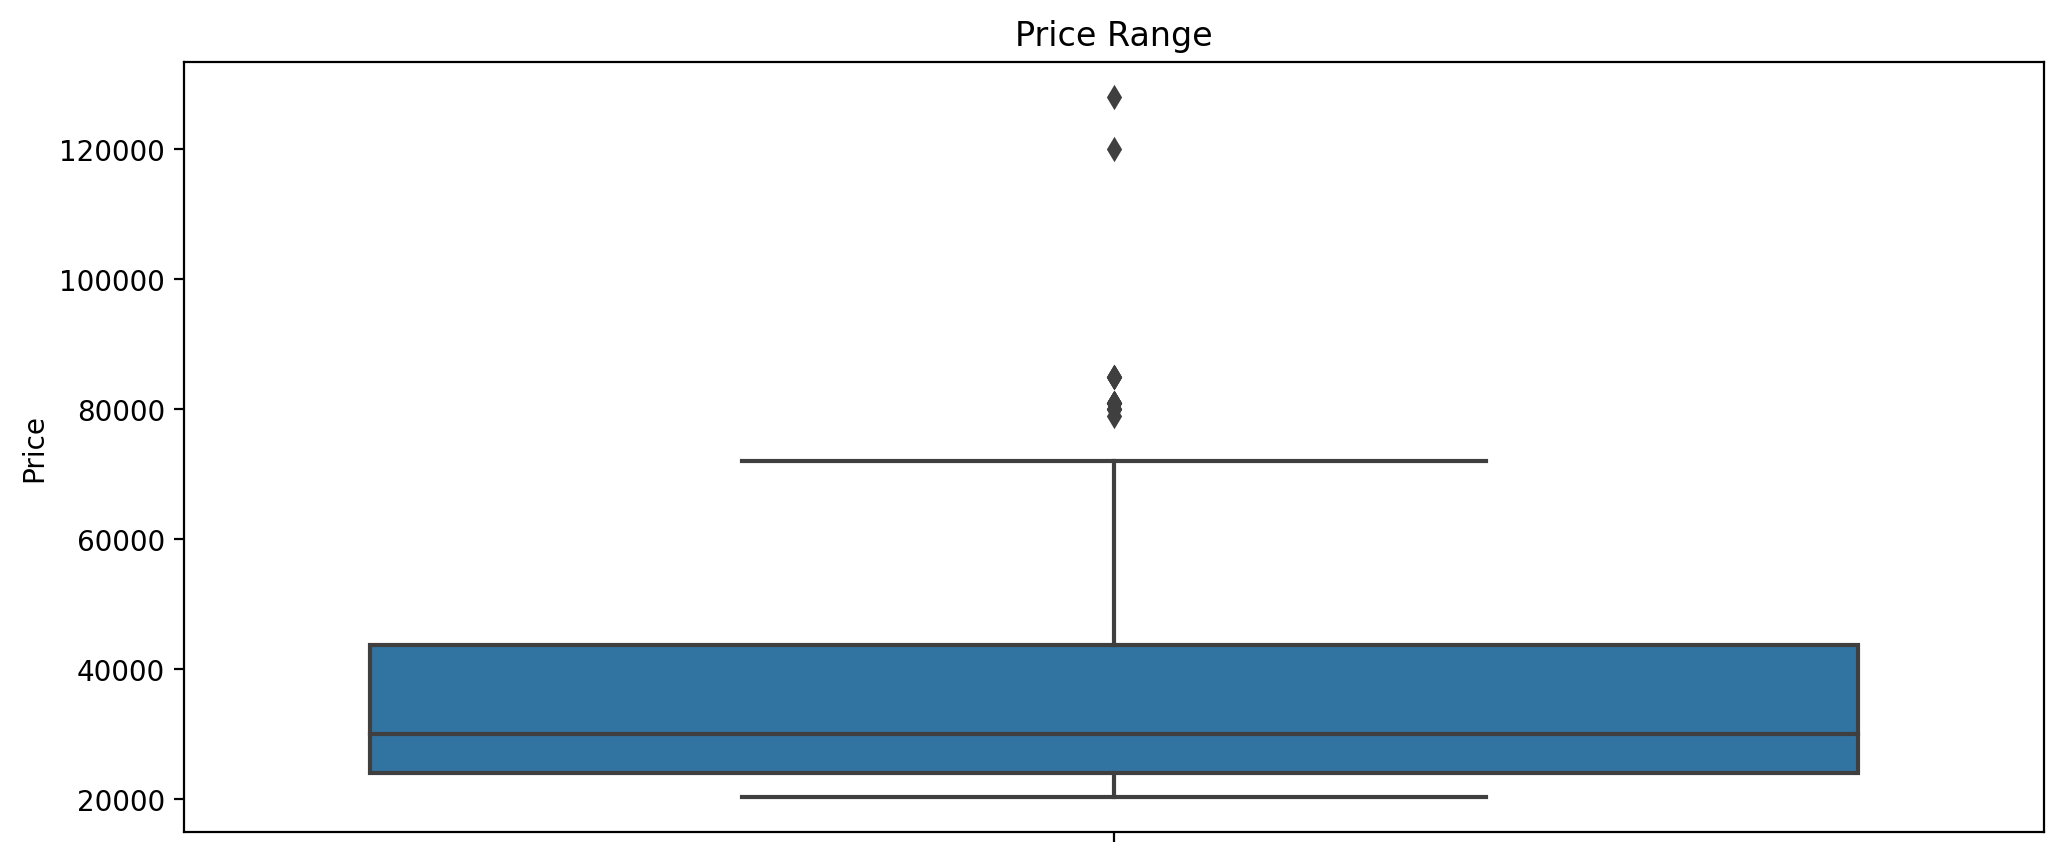

In [88]:
plt.figure(figsize=(12,5),dpi=200)
sns.boxplot(y='Price',data=df)
plt.title('Price Range')

Text(0.5, 1.0, 'Multiple Brands')

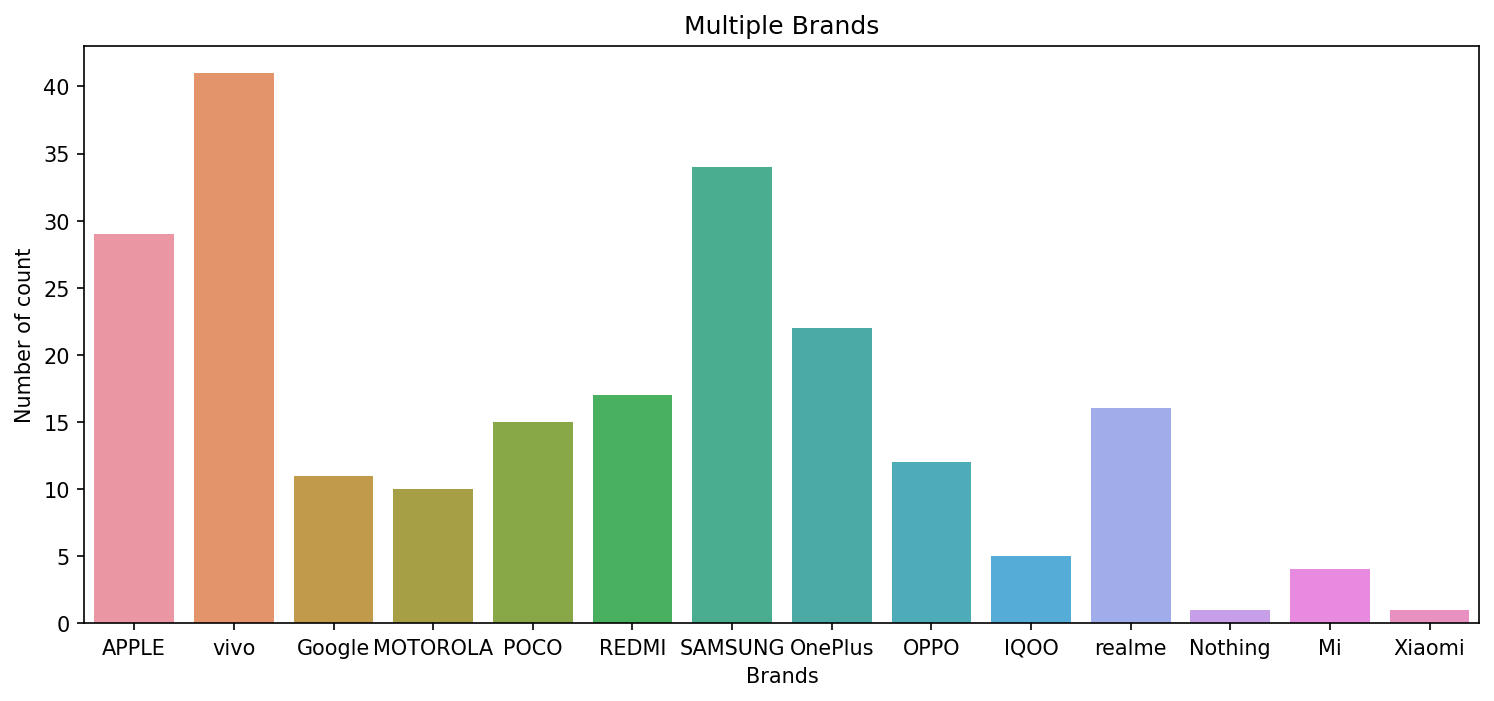

In [73]:
plt.figure(figsize=(12,5),dpi=150)
sns.countplot(x='Brand',data=df)
plt.xlabel('Brands')
plt.ylabel('Number of count')
plt.title('Multiple Brands')

Text(0.5, 1.0, 'Multiple Processor')

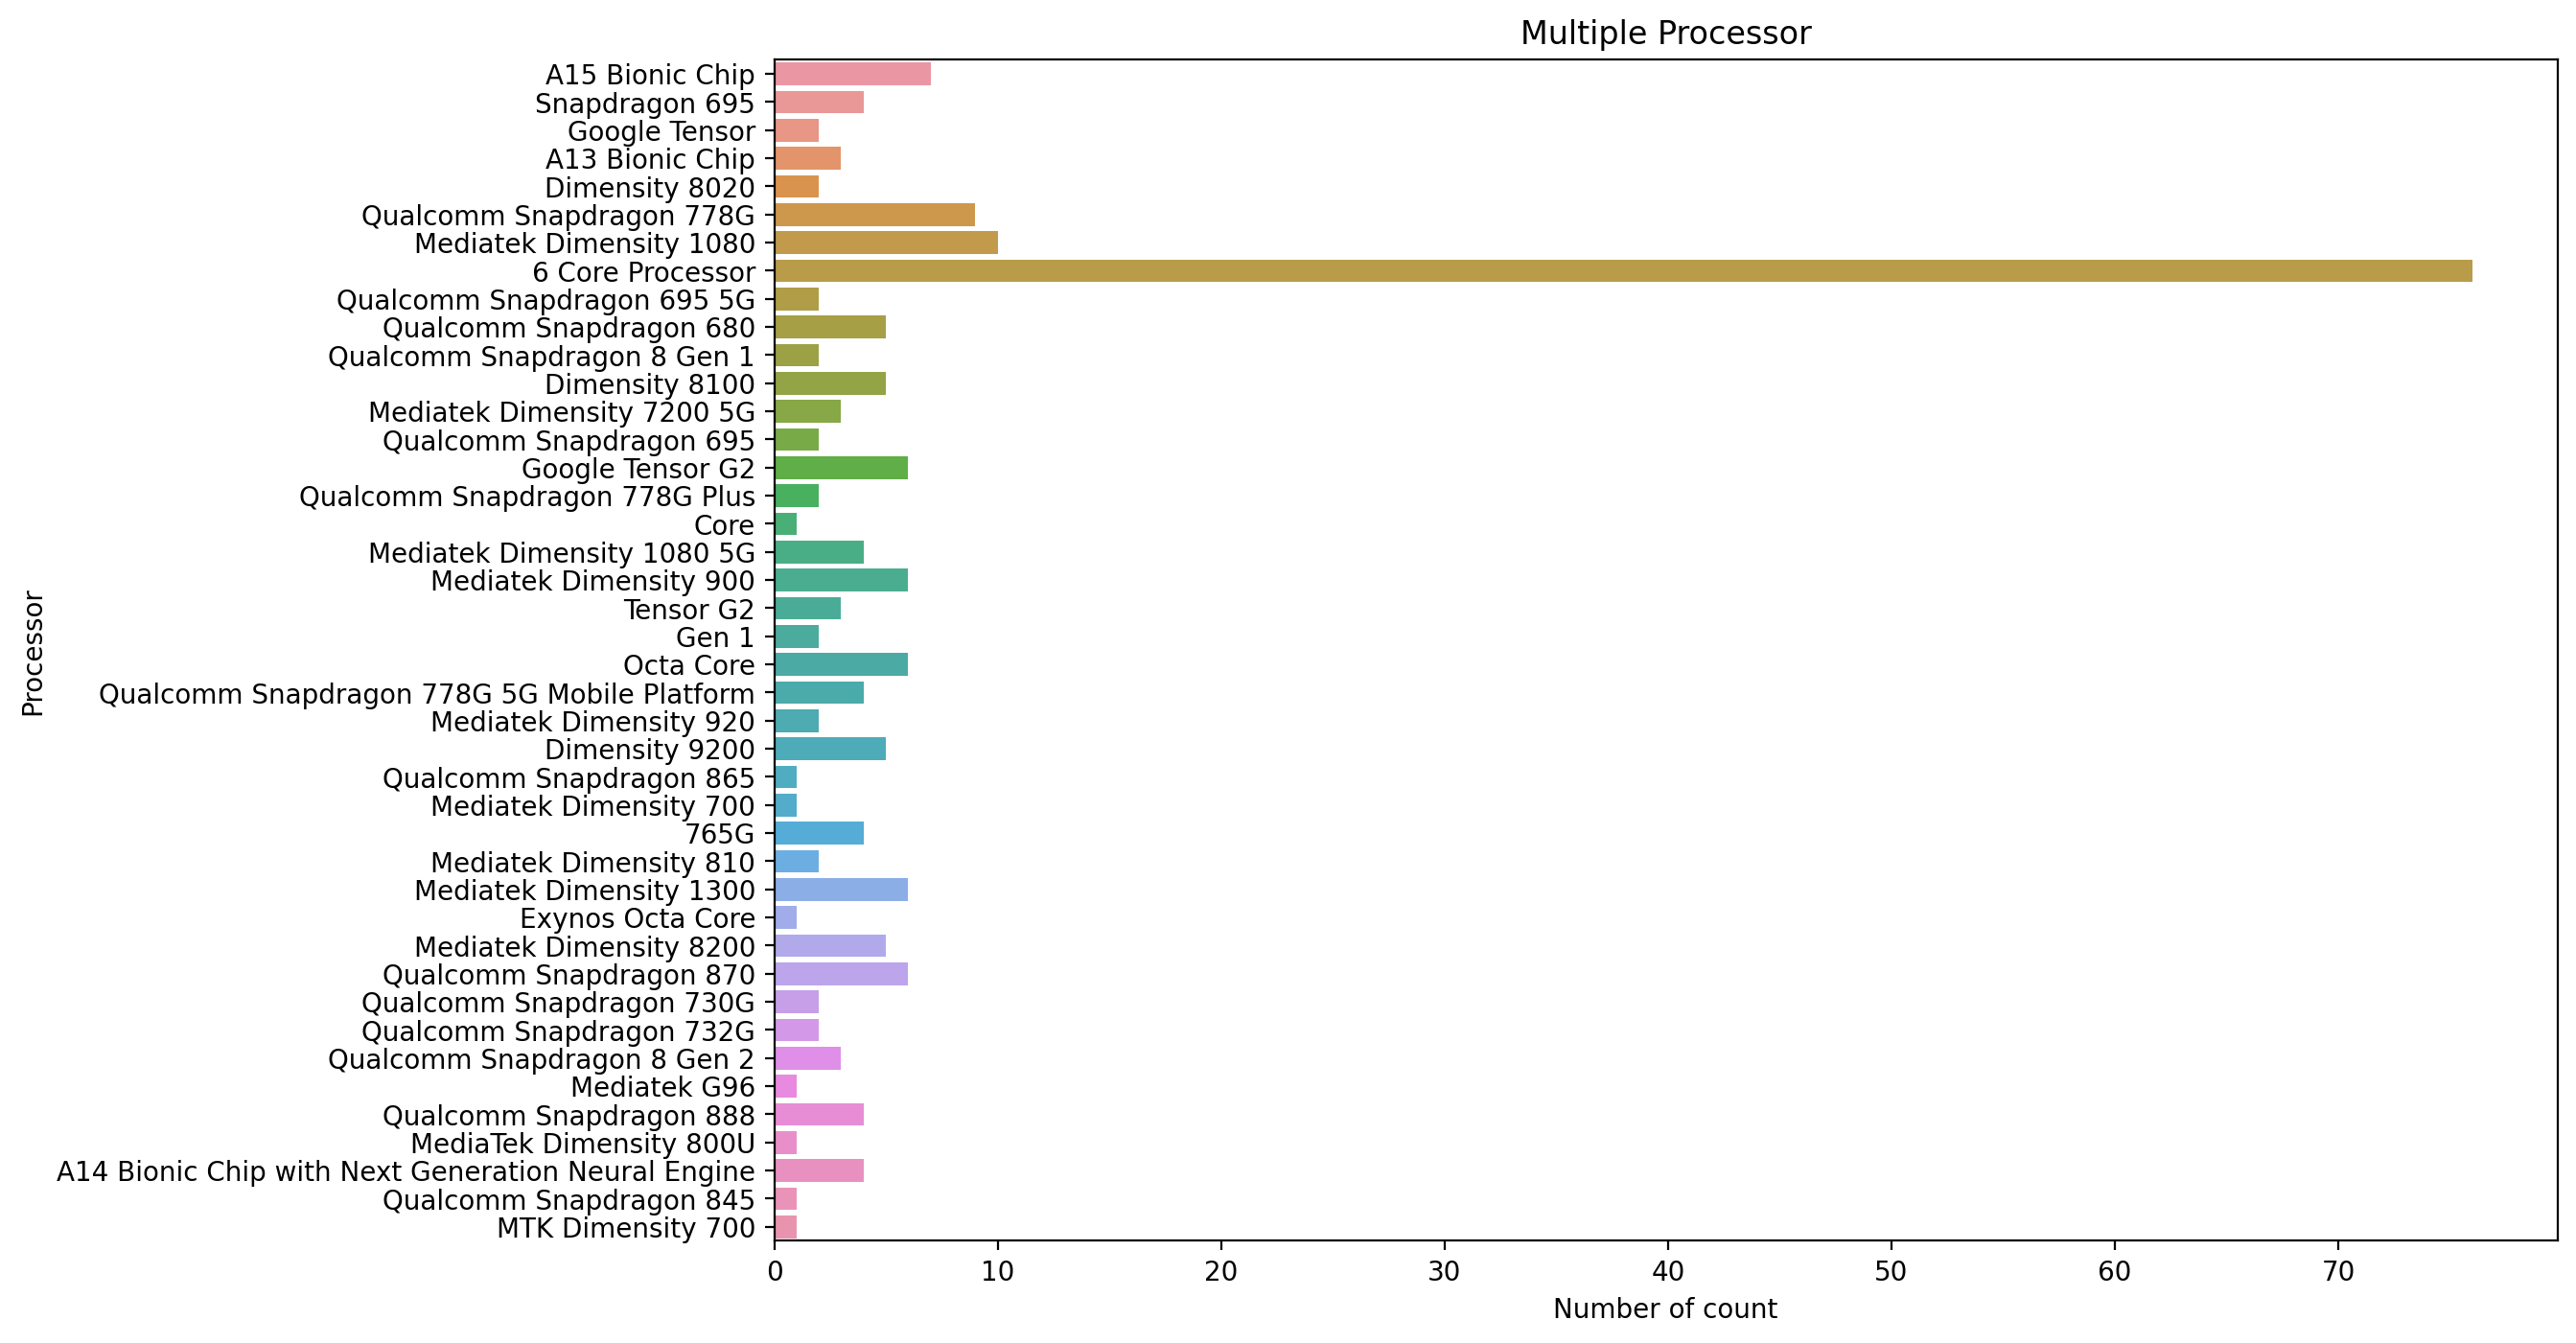

In [89]:
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(y='Processor',data=df)
plt.xlabel('Number of count')
plt.ylabel('Processor')
plt.title('Multiple Processor')

Text(0.5, 1.0, 'Multiple RAM')

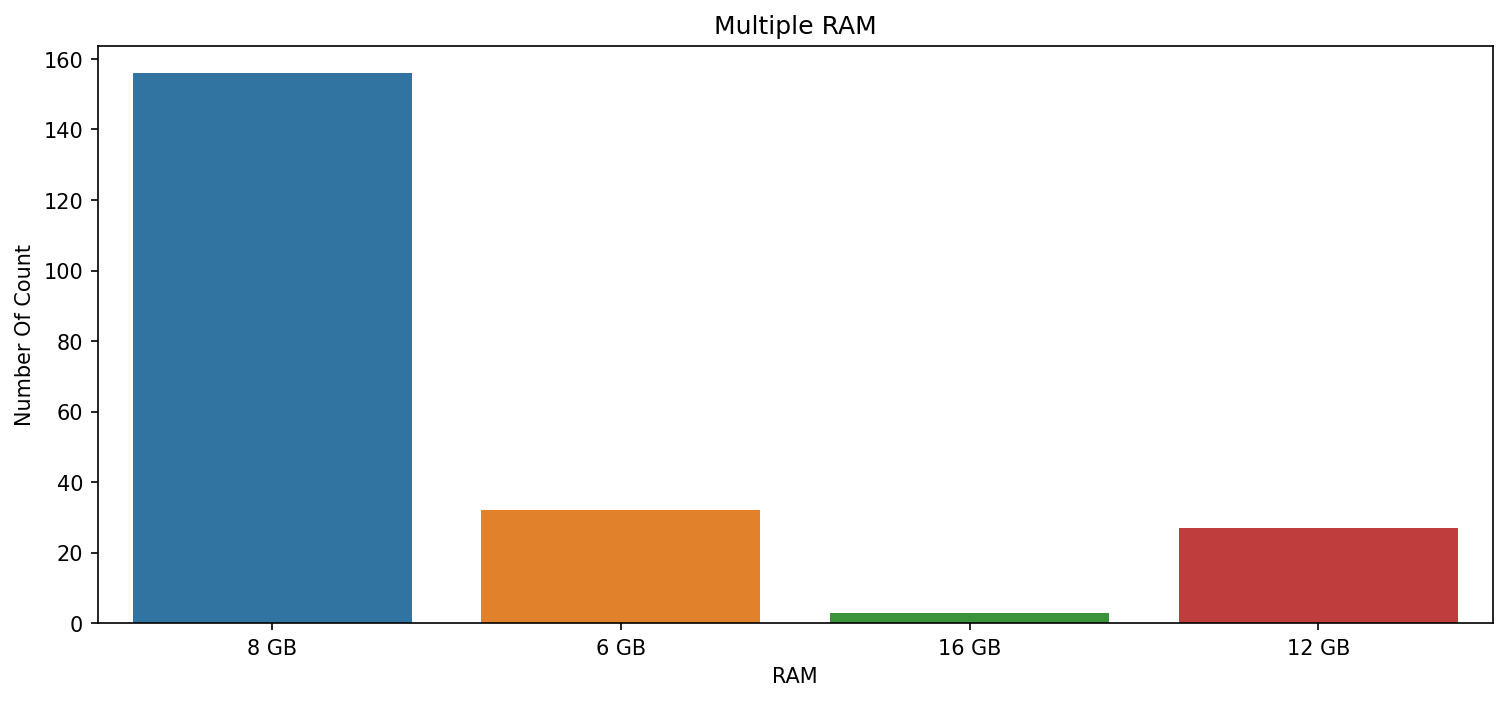

In [86]:
plt.figure(figsize=(12,5),dpi=150)
sns.countplot(x='RAM',data=df)
plt.xlabel('RAM')
plt.ylabel('Number Of Count')
plt.title('Multiple RAM')

Text(0.5, 1.0, 'Multiple ROM')

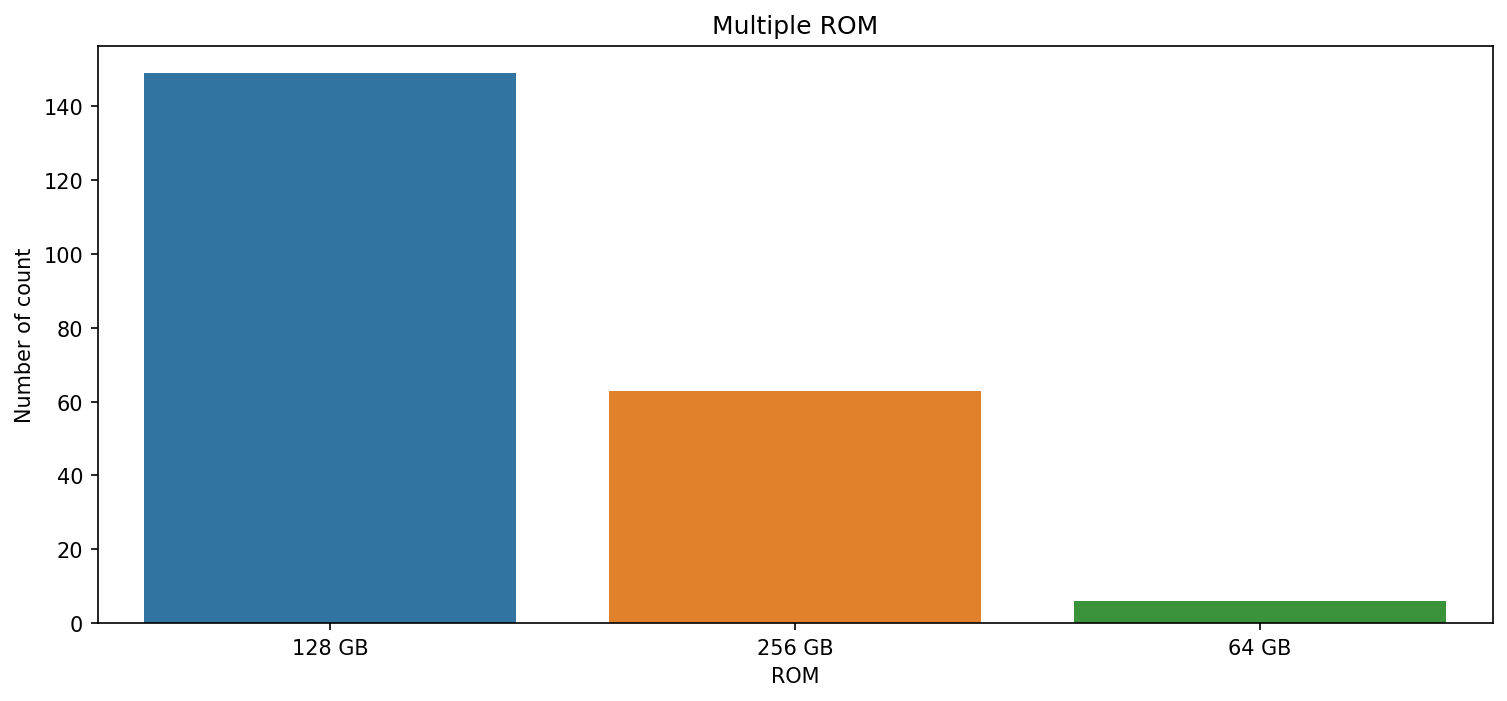

In [87]:
plt.figure(figsize=(12,5),dpi=150)
sns.countplot(x='ROM',data=df)
plt.xlabel('ROM')
plt.ylabel('Number of count')
plt.title('Multiple ROM')

Text(0.5, 1.0, 'Multiple Battery')

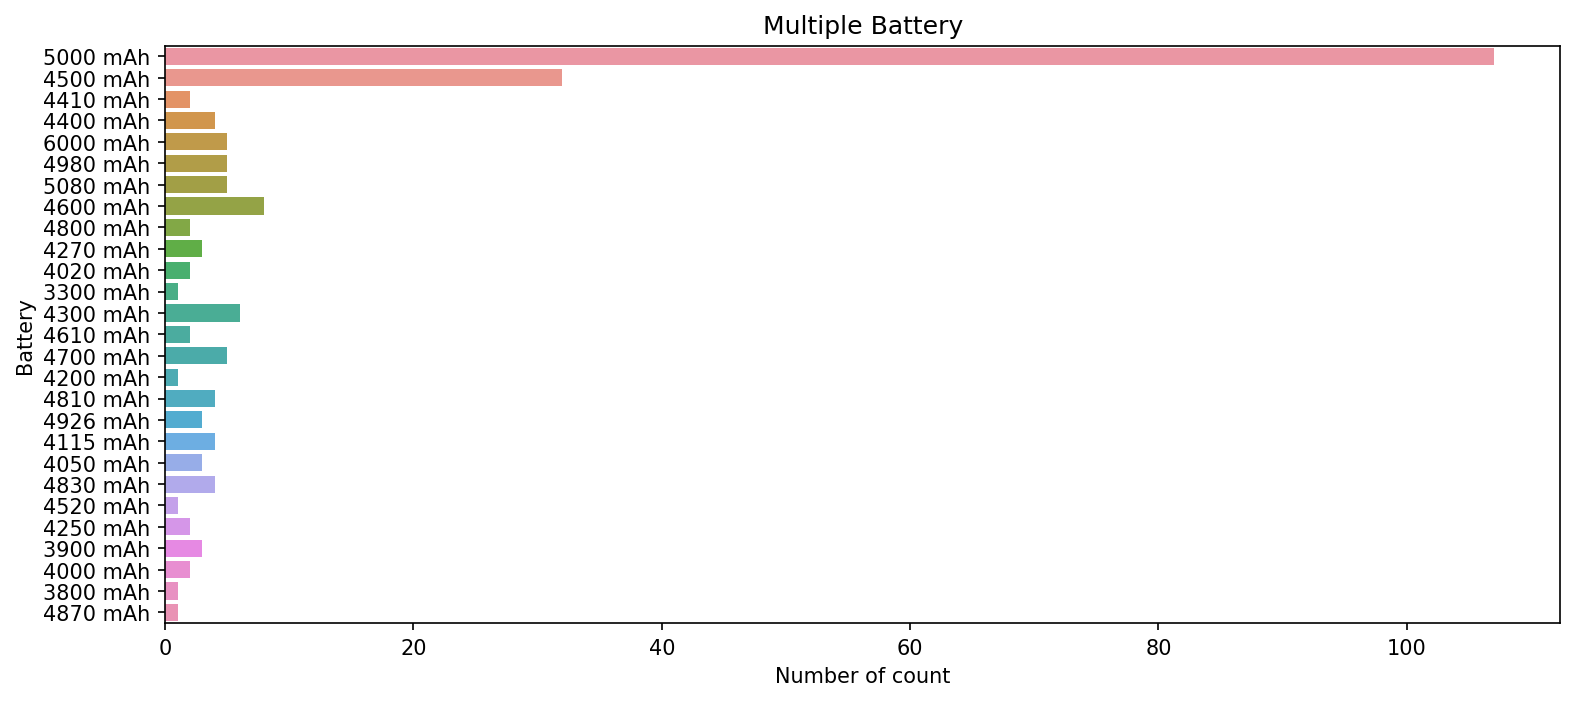

In [77]:
plt.figure(figsize=(12,5),dpi=150)
sns.countplot(y='Battery',data=df)
plt.xlabel('Number of count')
plt.ylabel('Battery')
plt.title('Multiple Battery')

Text(0.5, 1.0, 'Multiple Display Size')

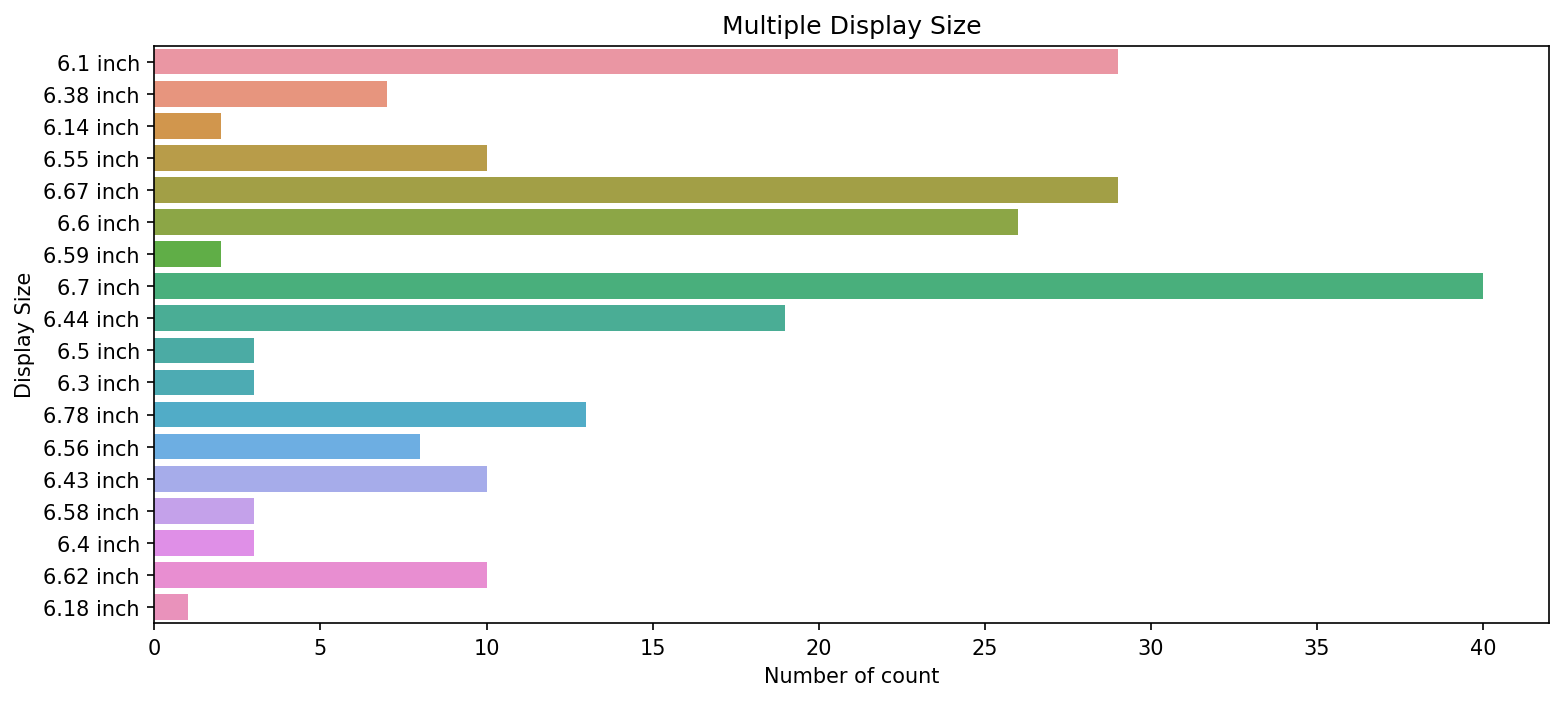

In [78]:
plt.figure(figsize=(12,5),dpi=150)
sns.countplot(y='Display_Size',data=df)
plt.xlabel('Number of count')
plt.ylabel('Display Size')
plt.title('Multiple Display Size')

Text(0.5, 1.0, 'Multiple Camera')

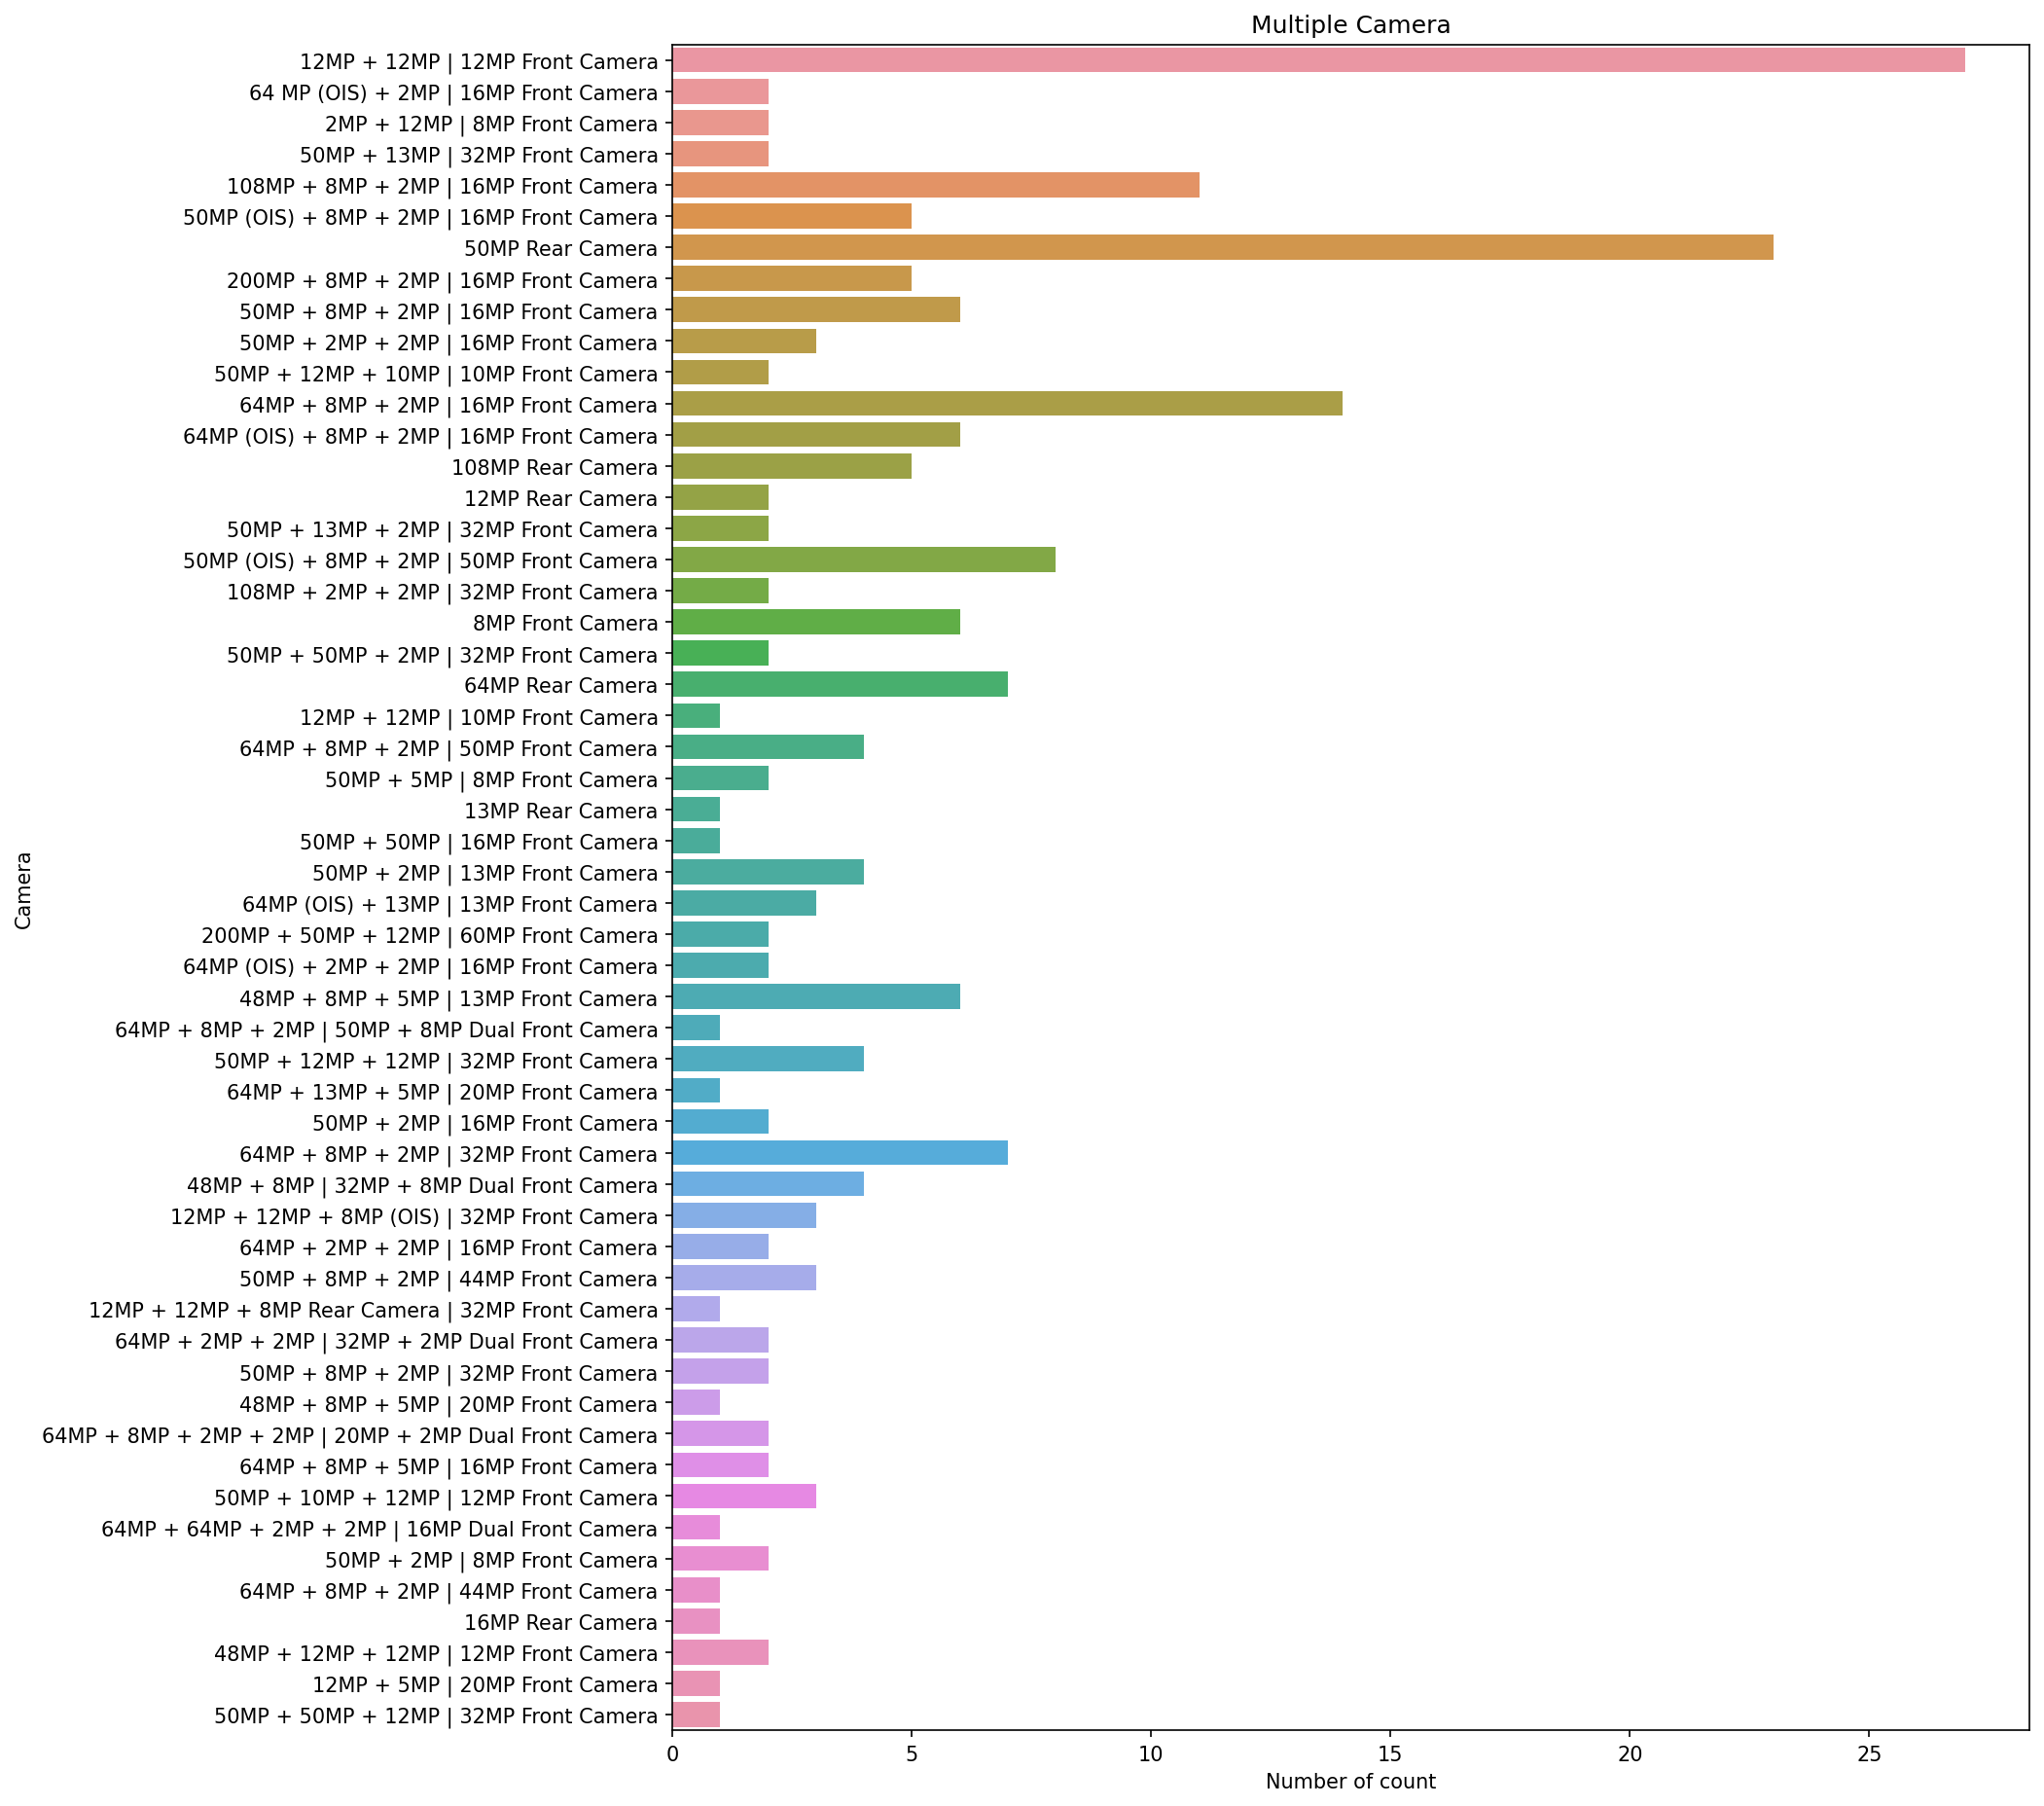

In [79]:
plt.figure(figsize=(12,15),dpi=150)
sns.countplot(y='Camera',data=df)
plt.xlabel('Number of count')
plt.ylabel('Camera')
plt.title('Multiple Camera')

# Comparisons of two column starts from here

Text(0.5, 1.0, 'Brand With Rating Plot')

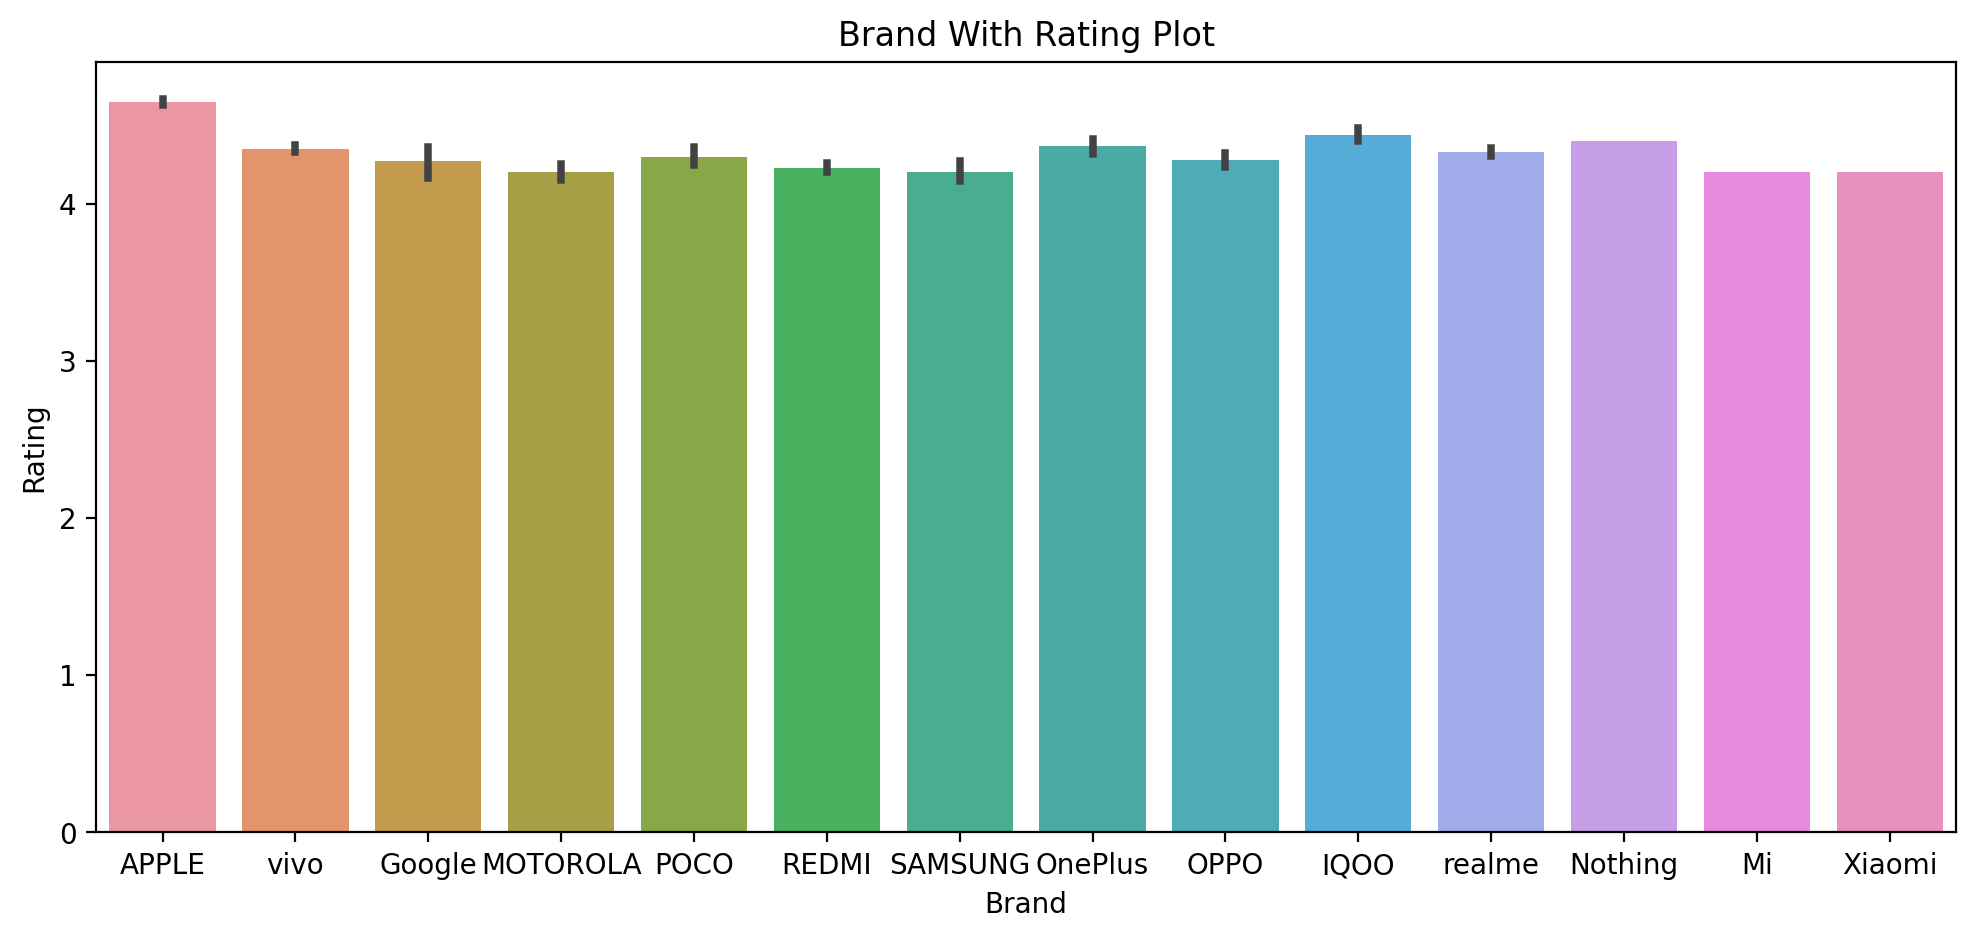

In [90]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(x='Brand', y='Rating', data = df)
plt.title('Brand With Rating Plot')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Brand and RAM Plot')

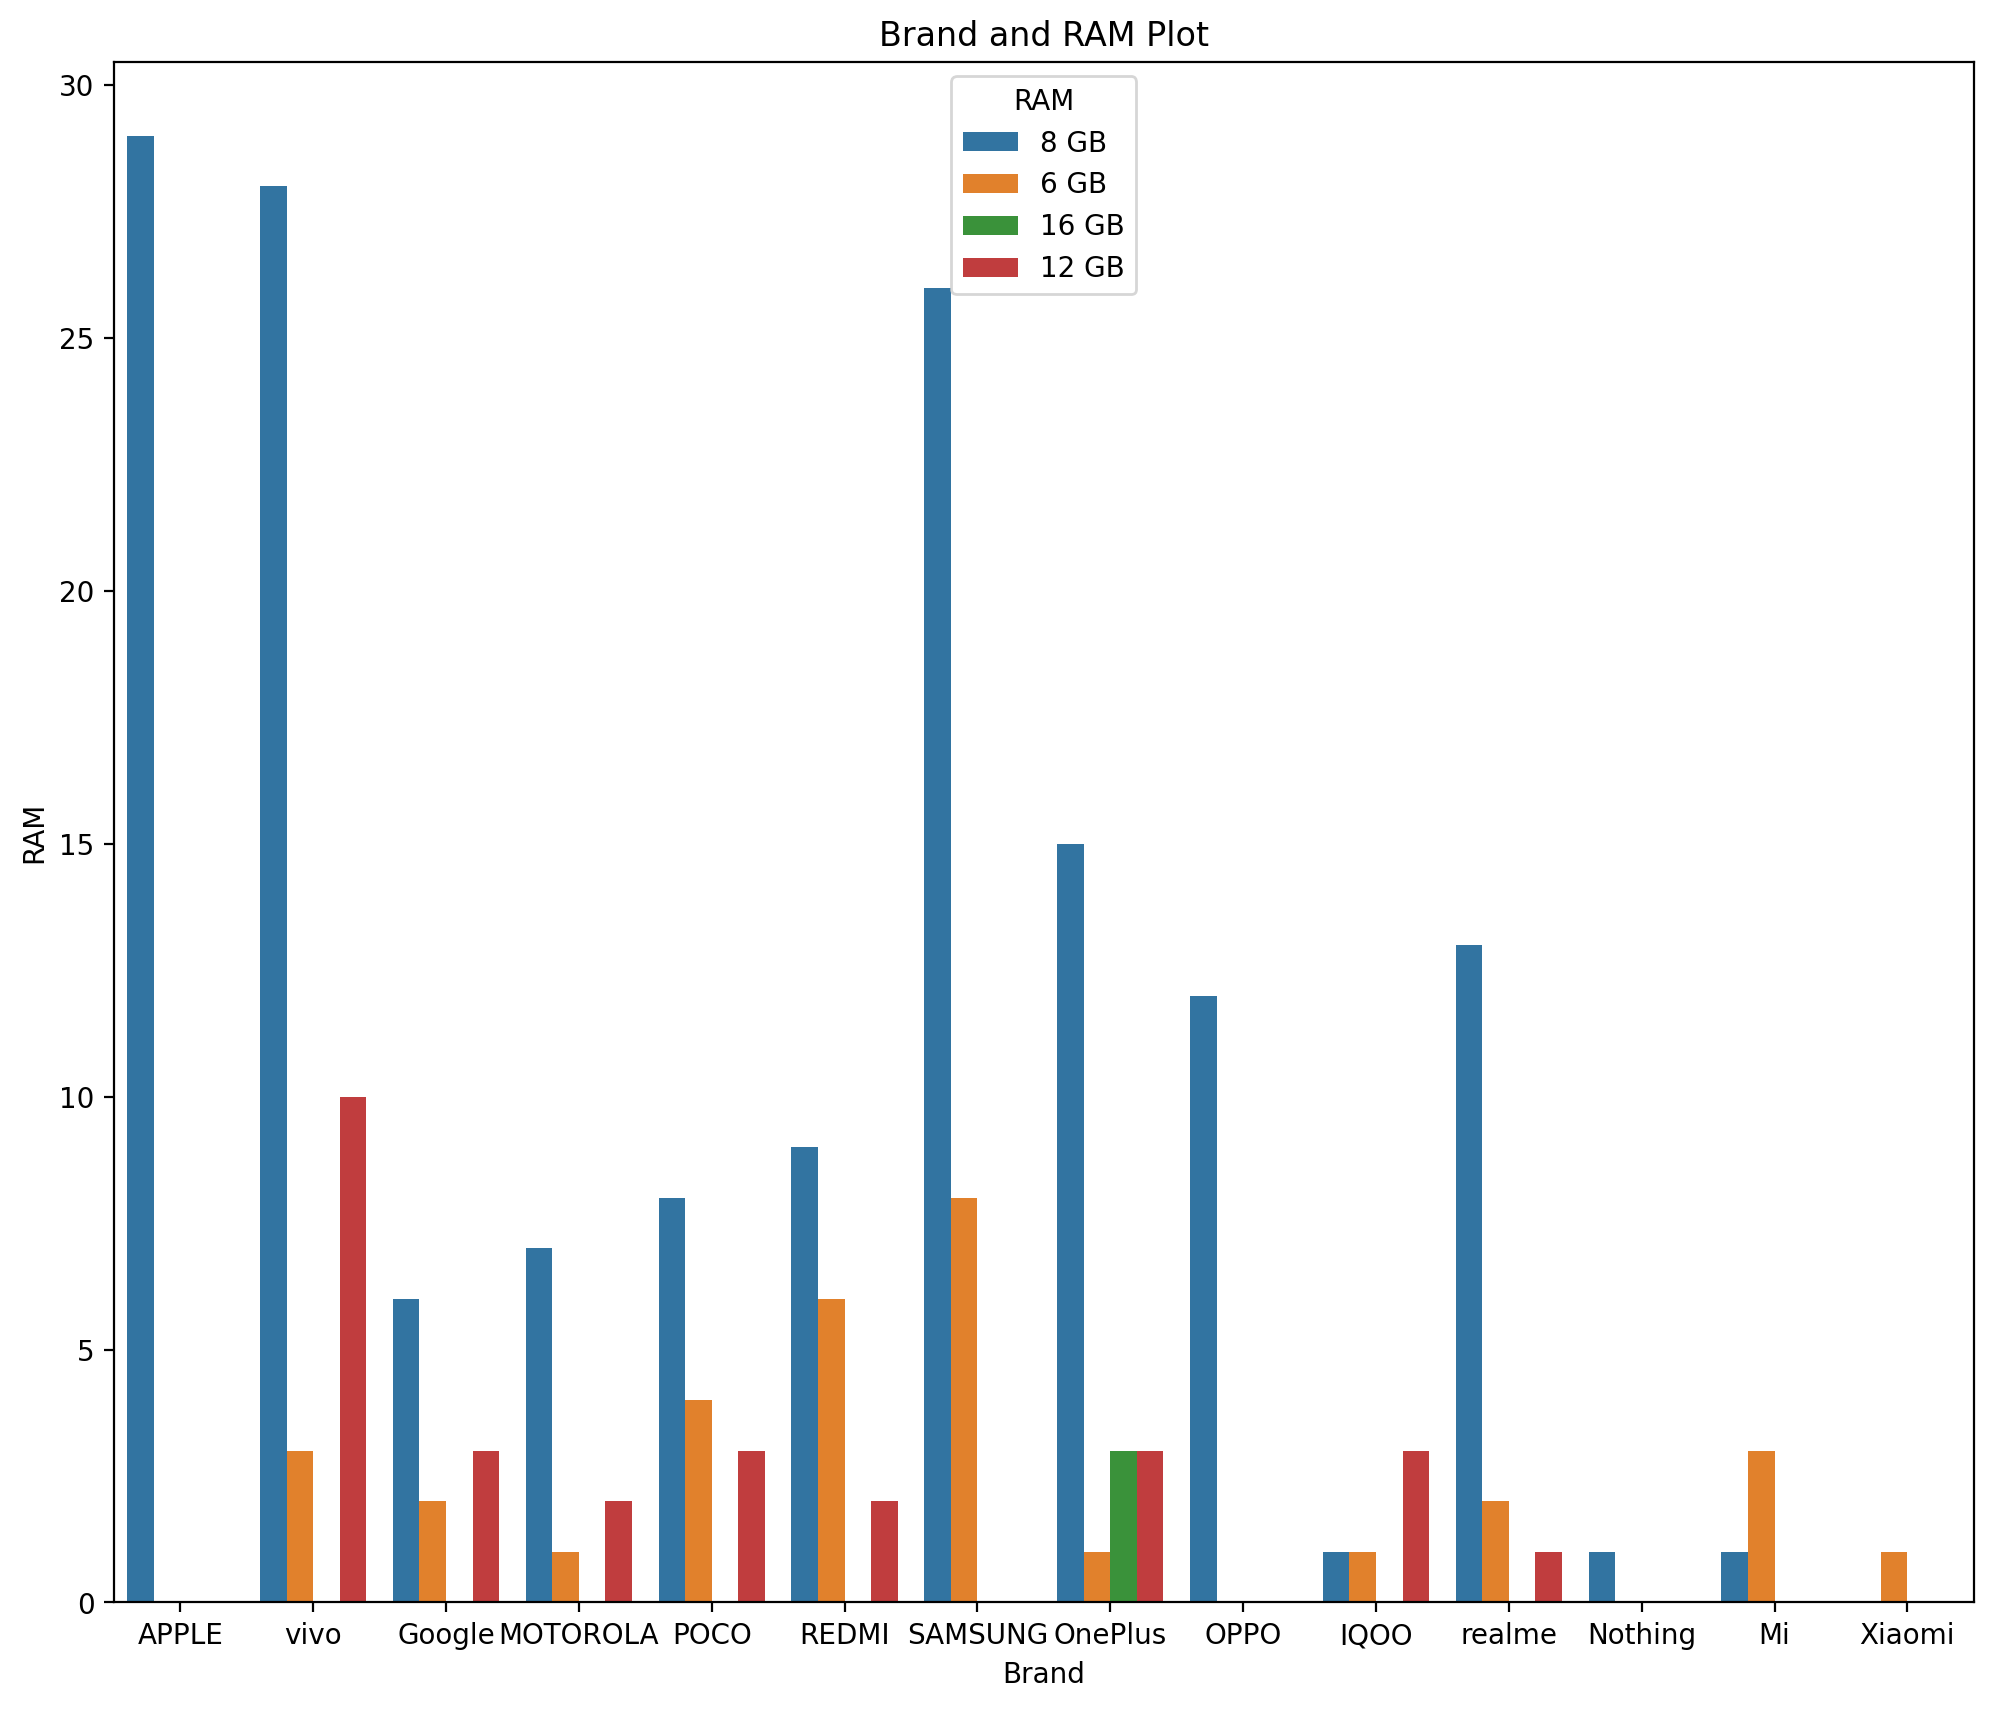

In [91]:
plt.figure(figsize = (12,10), dpi = 200)
sns.countplot(df['Brand'], hue = df['RAM'])
plt.xlabel('Brand')
plt.ylabel('RAM')
plt.title('Brand and RAM Plot')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Brand and ROM Plot')

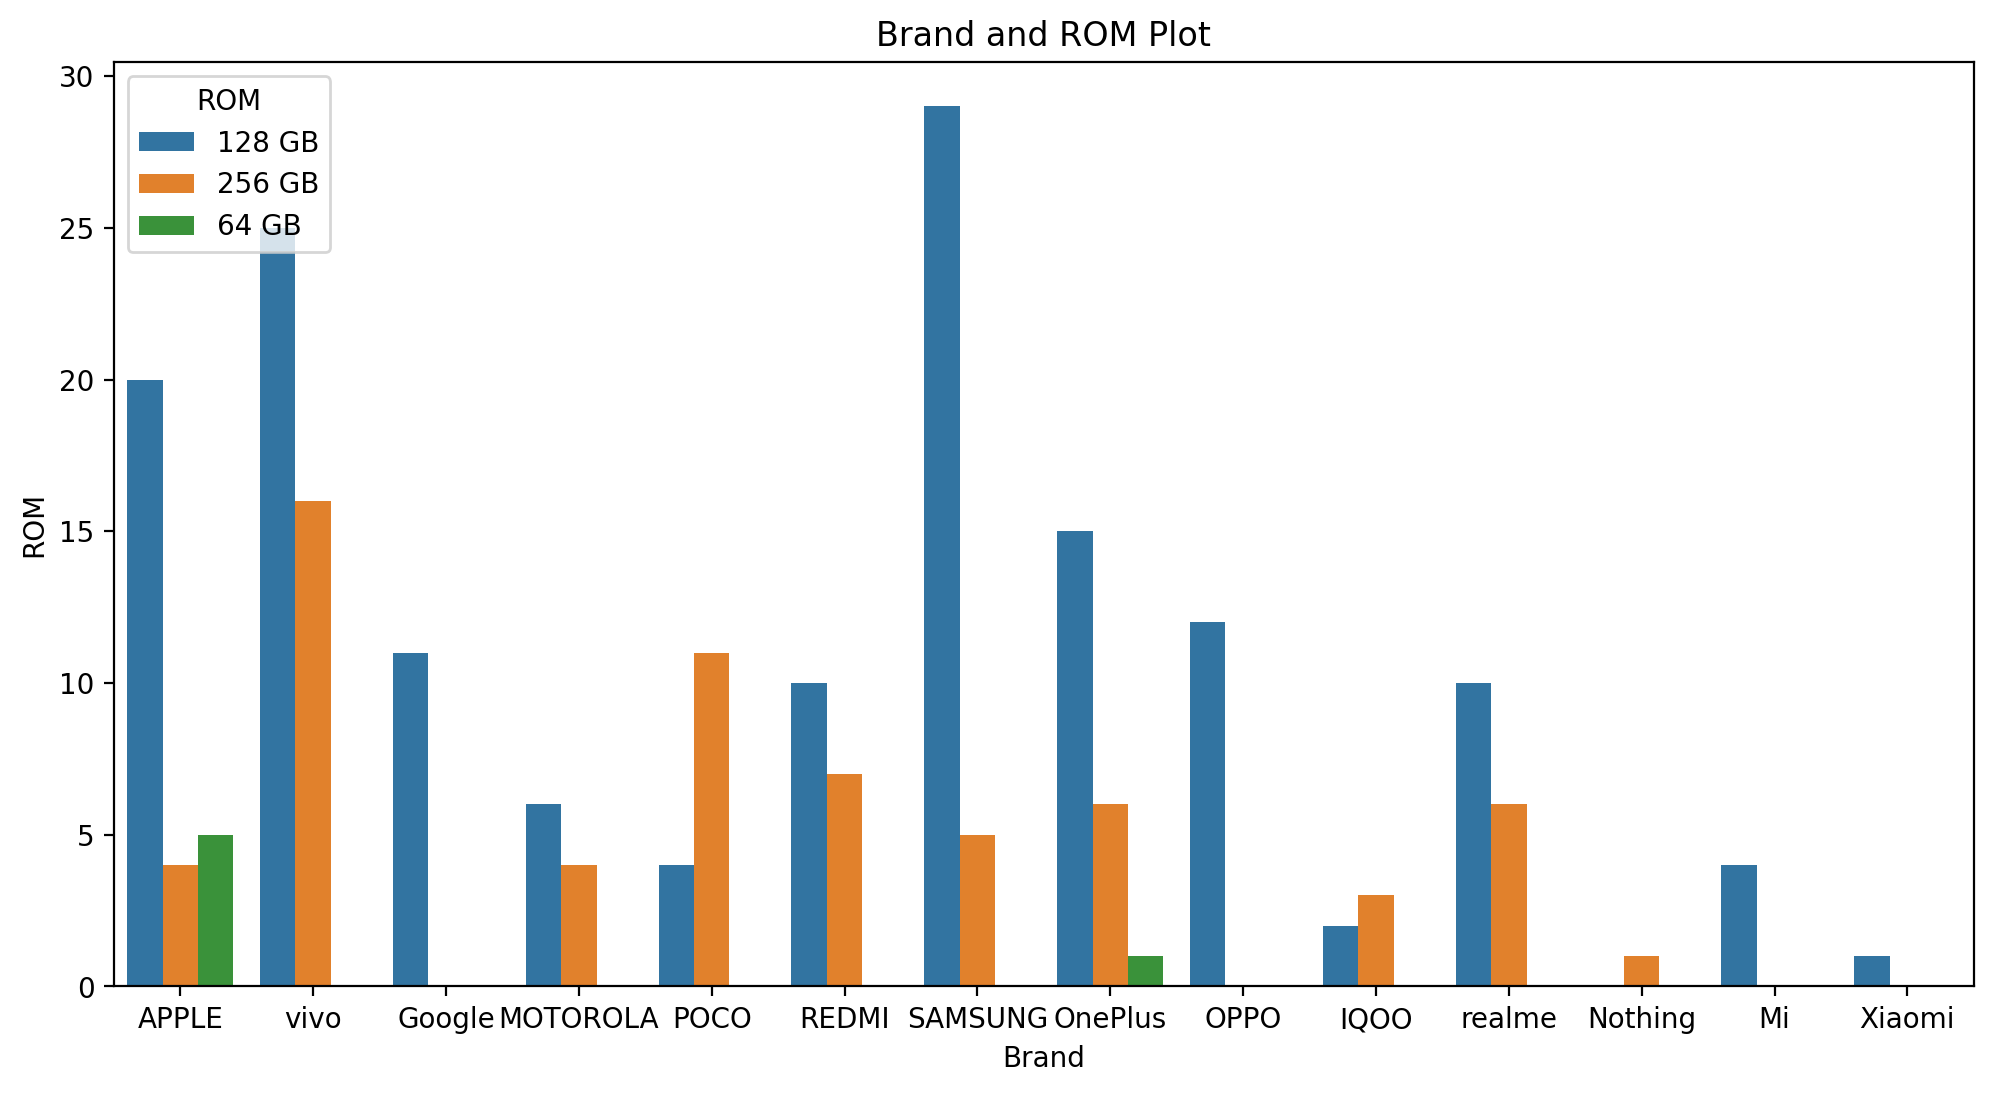

In [92]:
plt.figure(figsize = (12,6), dpi = 200)
sns.countplot(df['Brand'], hue = df['ROM'])
plt.xlabel('Brand')
plt.ylabel('ROM')
plt.title('Brand and ROM Plot')

Text(0.5, 1.0, 'Brand and Price Plot')

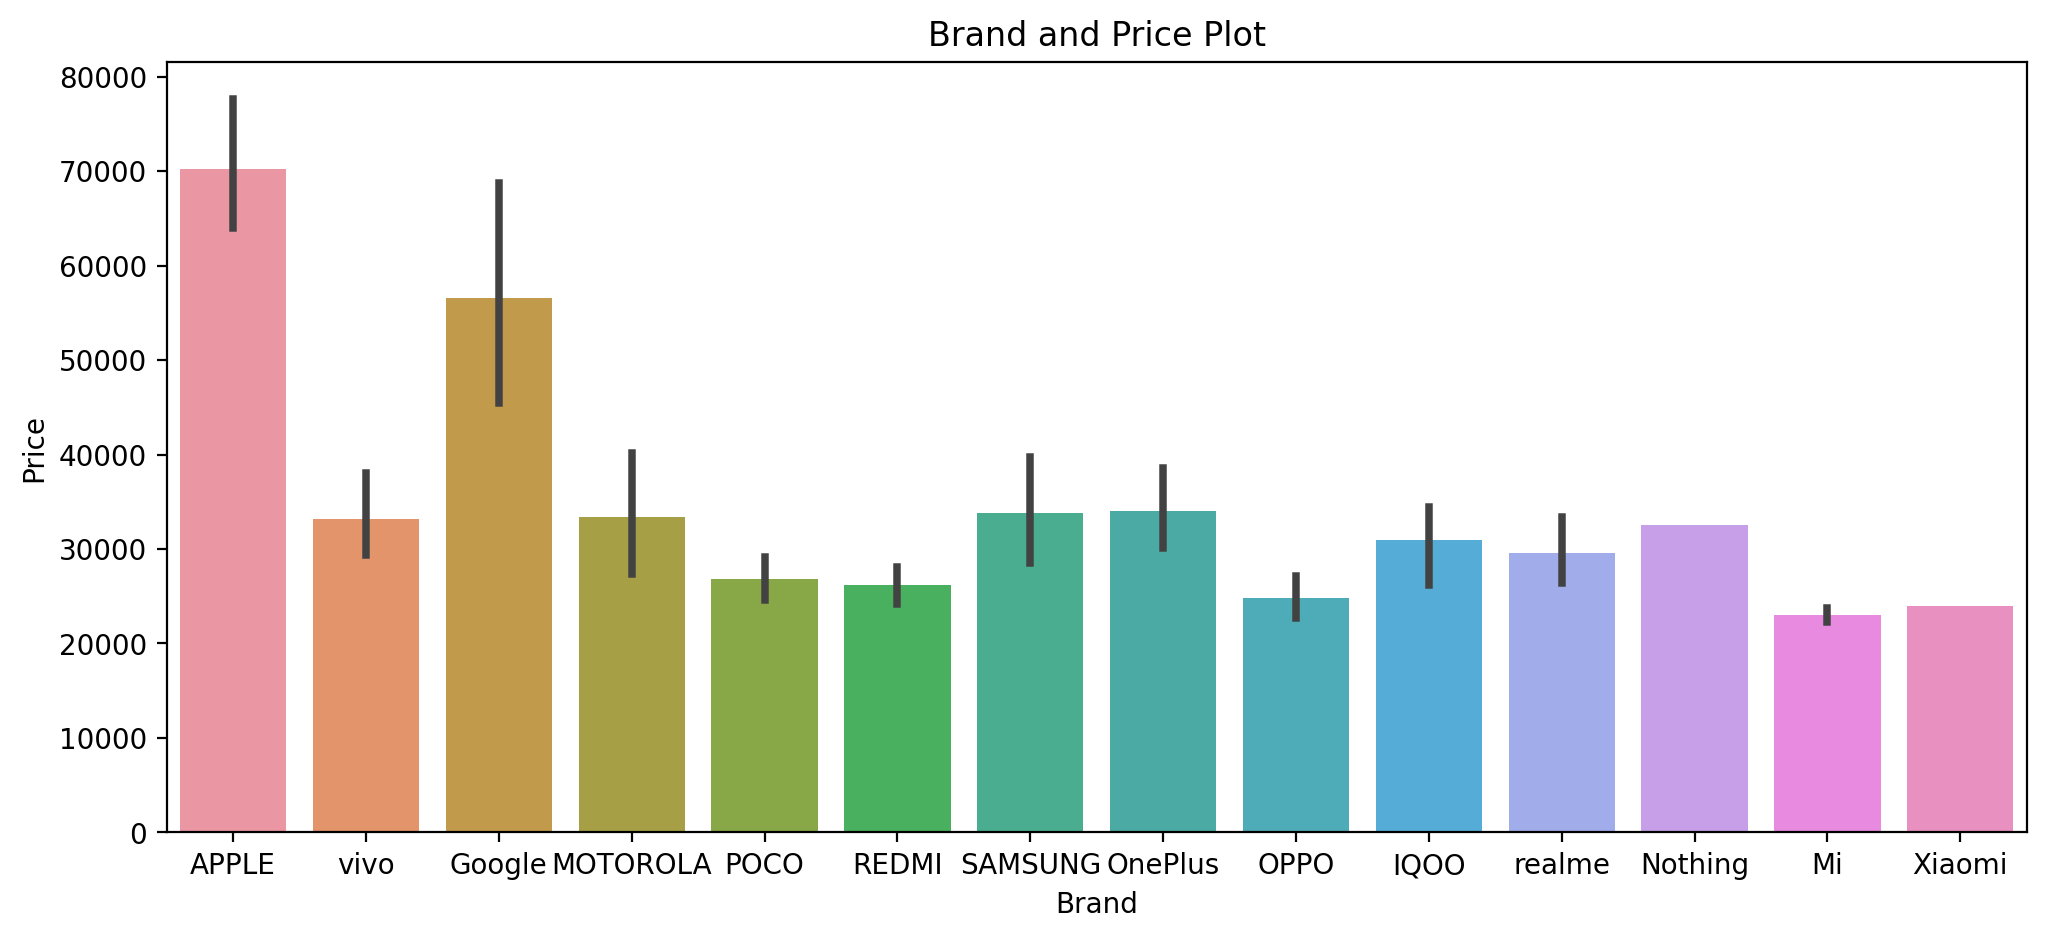

In [83]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(x='Brand', y='Price', data = df)
plt.title('Brand and Price Plot')

Text(0.5, 1.0, 'Brand and Number of Ratings Plot')

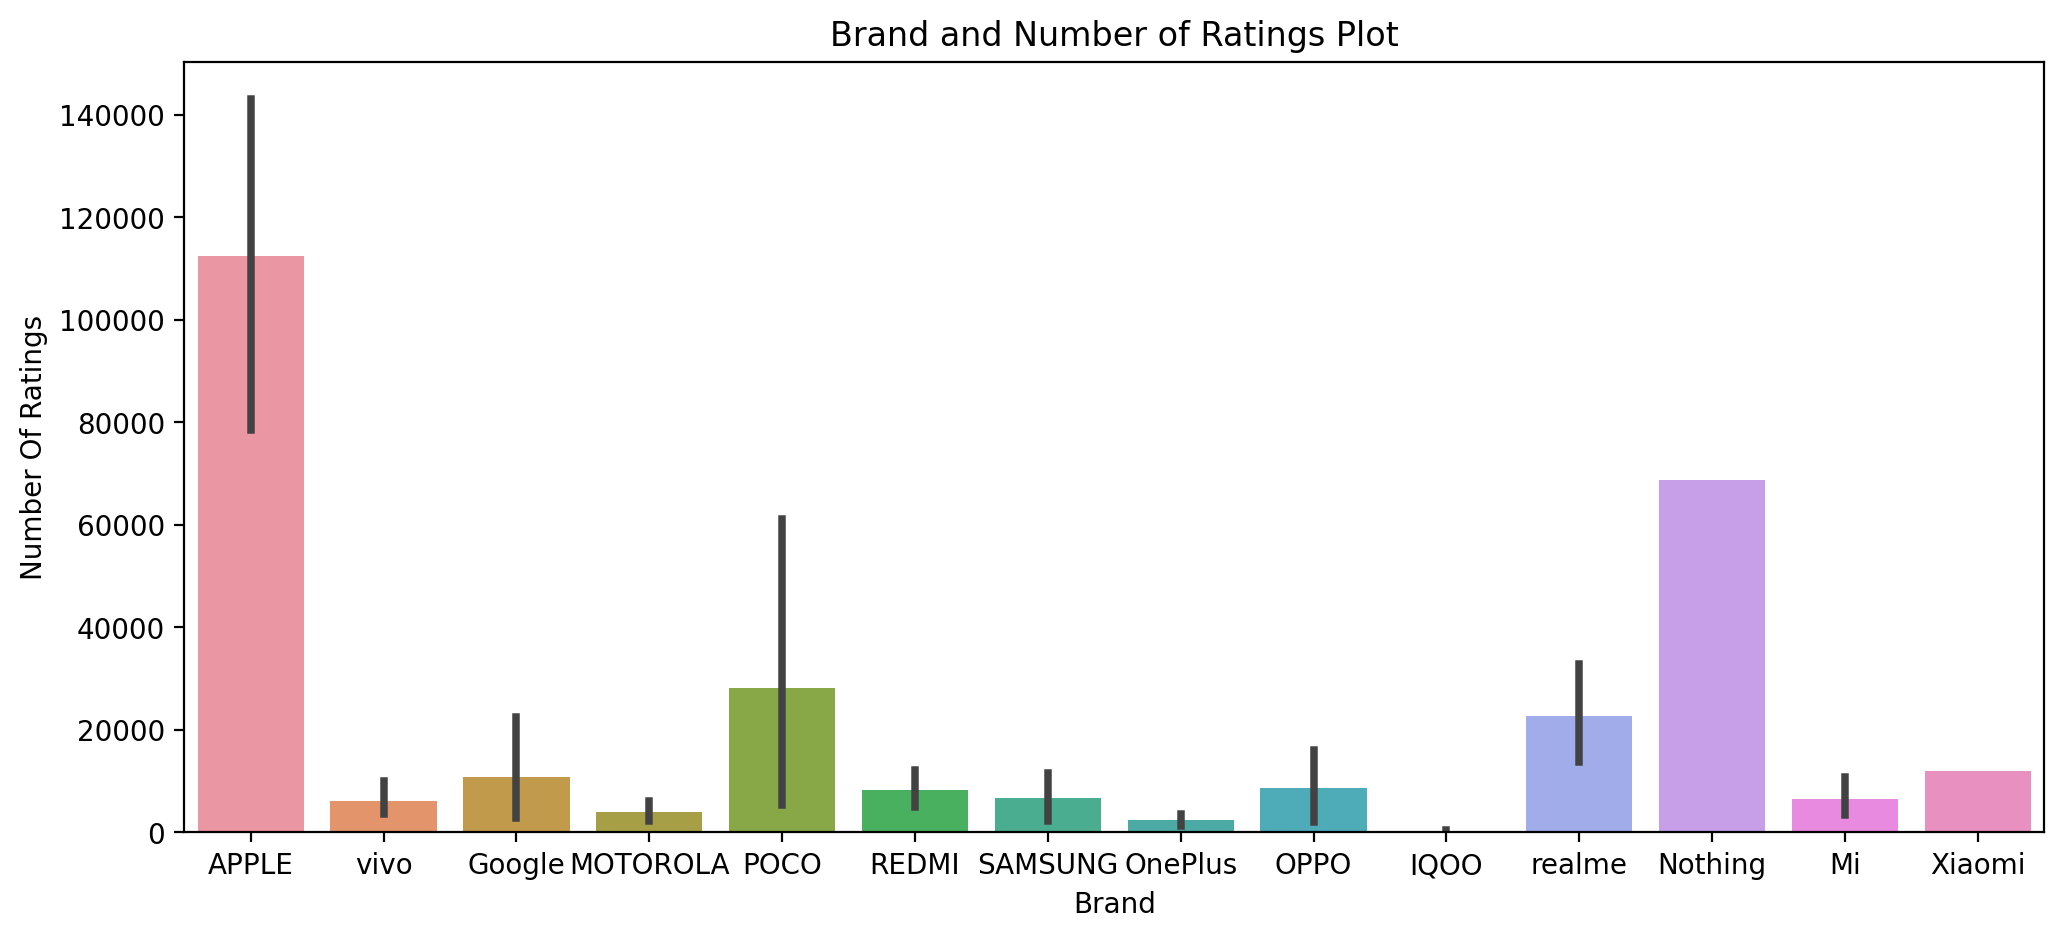

In [84]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(x='Brand', y='No_of_ratings', data = df)
plt.xlabel('Brand')
plt.ylabel('Number Of Ratings')
plt.title('Brand and Number of Ratings Plot')

Text(0.5, 1.0, 'Brand and Number of Reviews Plot')

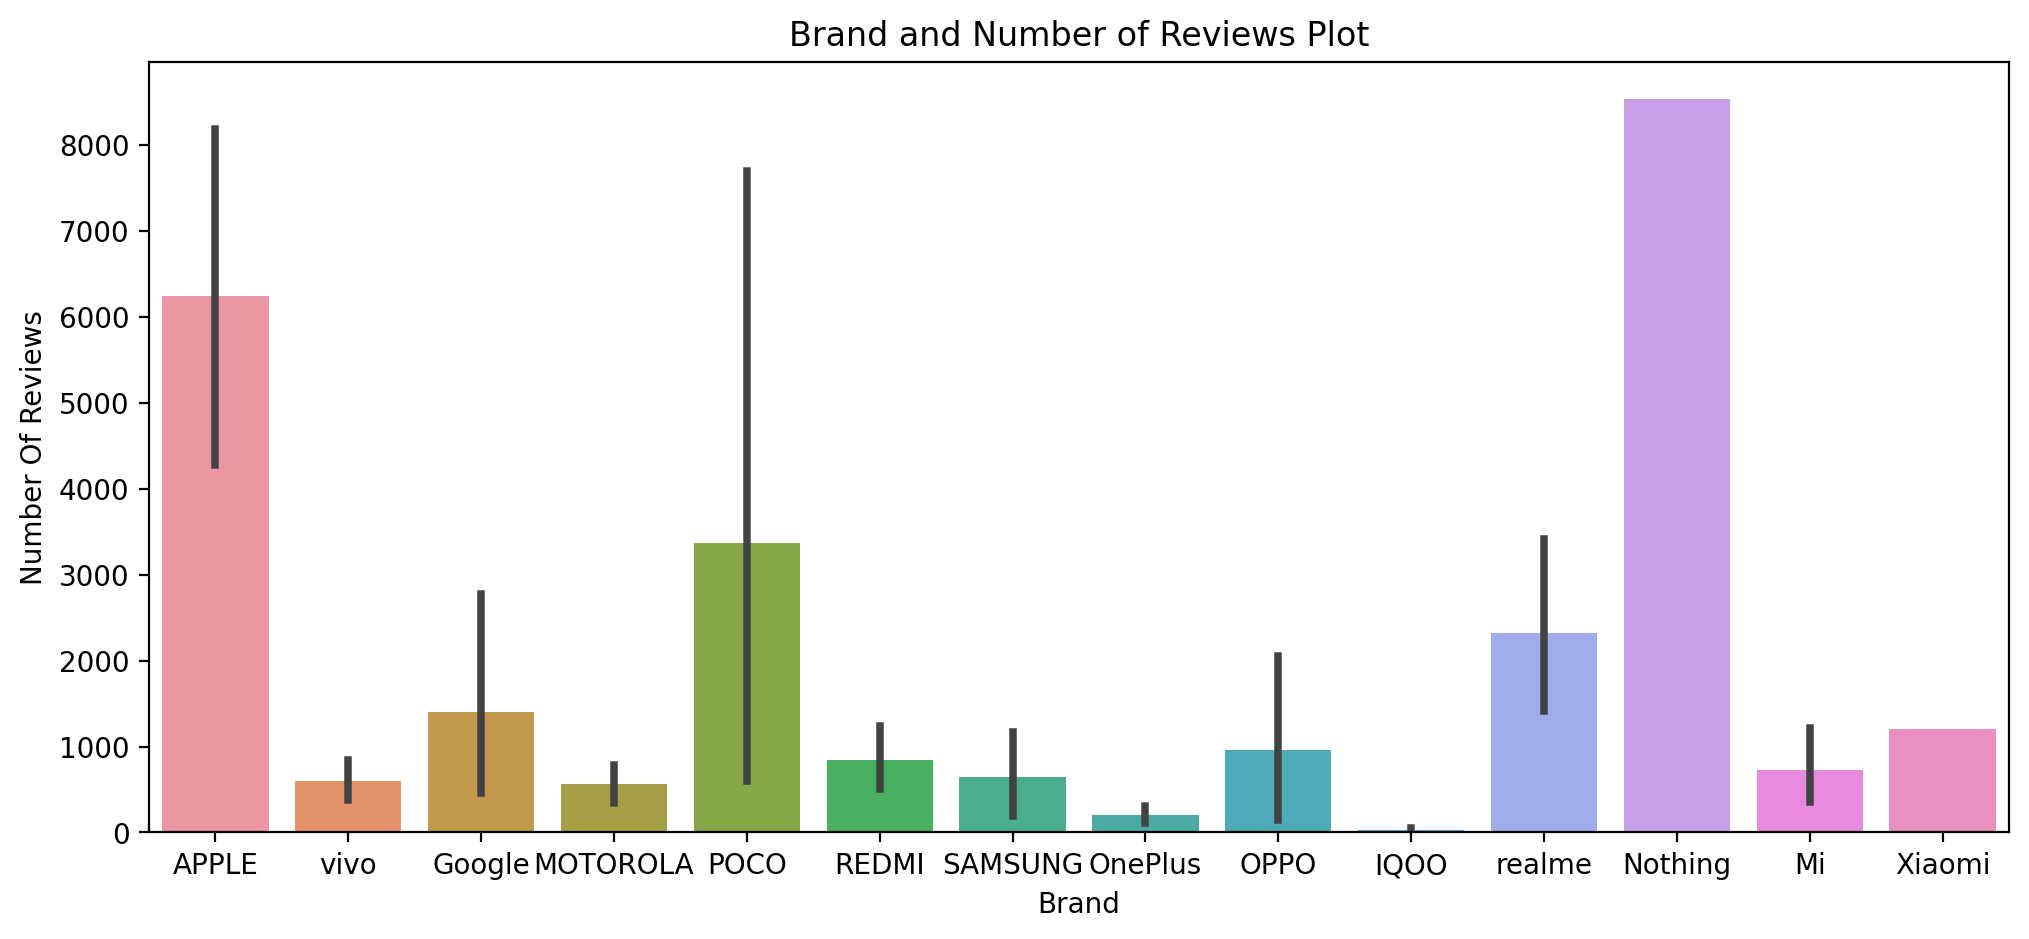

In [85]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(x='Brand', y='No_of_reviews', data = df)
plt.xlabel('Brand')
plt.ylabel('Number Of Reviews')
plt.title('Brand and Number of Reviews Plot')